In [1]:
##Imports##
import math
import scipy
import gc
import numpy as np
#from svm import *
import scipy.stats as st
import re
from statistics import NormalDist
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import pdb
import pandas as pd
# from joblib import Memory
from sklearn.datasets import load_svmlight_file
# import joblib\
import matplotlib
import matplotlib.colors as mcolors
import sklearn
from matplotlib.colors import LinearSegmentedColormap, ListedColormap, BoundaryNorm
from matplotlib.collections import LineCollection
import matplotlib.cm as cm
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import plotly.express as px
from matplotlib import container
import matplotlib.patches as mpatches
import matplotlib.lines as mlines

Here's our list of known progenitors

In [2]:
Collapsars = [050416461.0, 50525002.0, 050824966.0, 060218148.0, 060729800.0, 060904104.0, 070419447.0, 071025172.0, 071112772.0, 080319258.0, 081007224.0, 090618353.0, 091127976.0,\
                100316531.0, 100418882.0, 101219686.0, 101225776.0, 111209300.0, 111211928.0, 111228656.0, 120422300.0, 120714888.0, 120729455.0, 130215063.0, 130427324.0, 130702003.0, \
                    130831544.0, 140206303.0, 140606133.0, 150818483.0, 161219783.0, 161228552.0, 171010792.0, 171205306.0, 180720598.0, 180728728.0, 190114872.0, 190829830.0, 200826187.0,\
                          210210083.0, 211023545.0, 221009553.0, 200826187.0, 150210935.0]
Mergers=[070809807.0, 130603659.0, 150101641.0, 160624477.0, 160821936.0, 170817528.0, 200522487.0, 060614530.0, 111005336.0, 120304248.0, 211211549.0, 230307655.0, 050509166.0, \
          050709942.0, 051210240.0, 070714207.0, 071227842.0, 080503518.0, 080905499.0, 090515198.0, 160303454.0]

Make the plots for the prompt features hypothesis

The merger probability of 240205B is 0.05676548295596281, and it's collapsar probability is 0.9432345170440372.
The merger probability of 170817A is 709    0.716481
Name: Pm, dtype: float64, and it's collapsar probability is 709    0.283519
Name: Pc, dtype: float64.
we predict a 0.05 chance that the SBOAT was a merger and 0.95 that it was a collapsar. This contradicts our knowledge that it was merger, 
      likely because its fluence is so high.
we predict a 0.05 chance that the BOAT was a merger and 0.95 that it was a collapsar. This confirms our knowledge that it was a collapsar, 
       but probably only because its peak energy is so poorly constrained or because its fluence is so high.
1807


<Figure size 640x480 with 0 Axes>

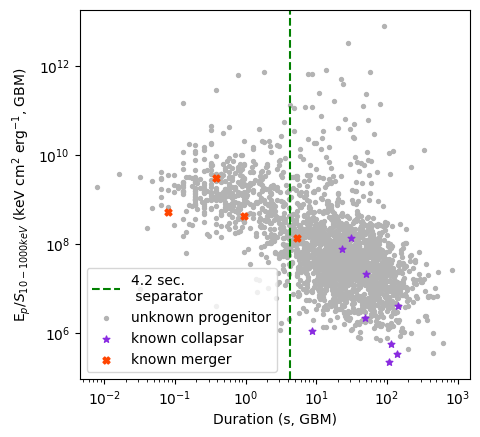

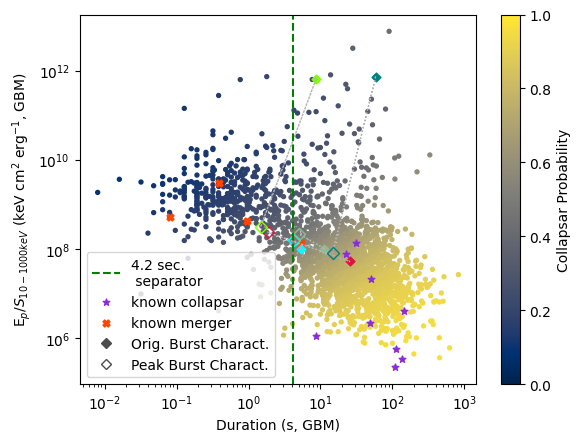

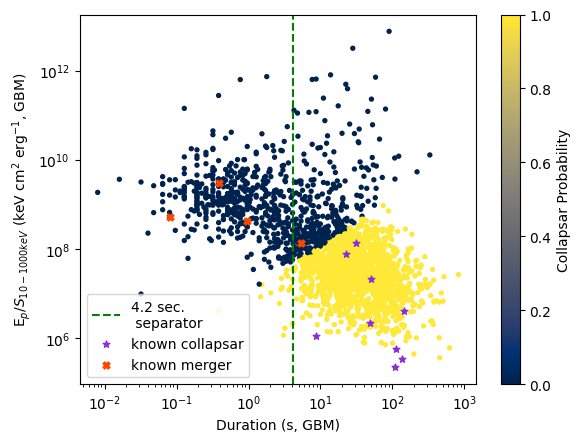

In [3]:
# data = load_svmlight_file("/Users/nnuessle/Documents/Work/burst_matching_algorithm/actual_paper/prompt-and-afterglow-matching/Goldstein_SVM.txt")
Goldstein_data=pd.read_csv("Goldstein_Full_DataSet_w_Name.csv")
Goldstein_training=pd.read_csv("Goldstein_Training_Set.csv")
x1=Goldstein_training['Peak_E_over_Flu'].values
x2=Goldstein_training['t90'].values
X=np.vstack((x1,x2)).T
Y=Goldstein_training['Classification.'].values
Y[Y==2]=0
 
xx1=Goldstein_data['Peak_E_over_Flu'].values
xx2=Goldstein_data['t90'].values
Xtest=np.vstack((xx1,xx2)).T
 
model=sklearn.svm.SVC(kernel='rbf',probability=True,class_weight='balanced')
# clf=sklearn.svm.SVC(probability=True, kernel='sigmoid', gamma='auto')
# clf=sklearn.svm.SVC(probability=True, kernel='poly',degree=3)
# sklearn.svm.SVC(kernel='rbf',probability=True,class_weight='balanced')
model.fit(X,Y)
p=model.predict_proba(Xtest)

X_single=np.log10(34/(4.9464e-05))
Y_single=np.log10(47.105)
Xtest_single=np.vstack((X_single, Y_single)).T
print("The merger probability of 240205B is {}, and it's collapsar probability is {}.".format(model.predict_proba(Xtest_single)[0][0], model.predict_proba(Xtest_single)[0][1]))
# These are the bursts from the time-resolved spectral analysis
X_more_tests=[np.log10(372/1.58E-06), np.log10(62.4/4.00E-07), np.log10(80.1/3.73E-07), np.log10(59.9/1.94E-07), np.log10(260/3.20E-06)]
Y_more_tests=[np.log10(1.84), np.log10(4.30), np.log10(5.08), np.log10(1.47), np.log10(14.8)]
Xmore_tests_2=np.vstack((X_more_tests, Y_more_tests)).T
# Here's their unchanged versions
X_even_more_tests=[7.715457, 8.004697, 7.999913, 11.810509, 11.851795]
Y_even_more_tests=[1.40824, 0.730459, 1.051693, 0.939719, 1.766182]
Xmore_tests_3=np.vstack((X_even_more_tests, Y_even_more_tests)).T
#

# lazy way of grabbing a specific burst
All_Final_Data=pd.DataFrame(np.vstack((Goldstein_data['Name'].values, Goldstein_data['Peak_E_over_Flu'].values, Goldstein_data['t90'].values, p[:,0], p[:,1])).T, \
                            columns=['Name', 'Indicator', 't90', 'Pm', 'Pc'])
# print(All_Final_Data.sort_values(by=['Indicator'], ascending=False).to_string())
array_170817A=All_Final_Data[All_Final_Data['Name']==170817529.0]
print("The merger probability of 170817A is {}, and it's collapsar probability is {}.".format(array_170817A['Pm'], array_170817A['Pc']))
#
X_SBOAT=[(np.log10(1000/3.1475e-03))]
Y_SBOAT=[np.log10(34.561)]
XSBOAT=np.vstack((X_SBOAT, Y_SBOAT)).T
preds_SBOAT=model.predict_proba(XSBOAT)
print("we predict a {:0.2f} chance that the SBOAT was a merger and {:0.2f} that it was a collapsar. This contradicts our knowledge that it was merger, \n\
      likely because its fluence is so high.".format(preds_SBOAT[0][0], preds_SBOAT[0][1]))
#
X_BOAT=[np.log10(1387/9.47e-02)]
Y_BOAT=[np.log10(289)]
XBOAT=np.vstack((X_SBOAT, Y_SBOAT)).T
preds_BOAT=model.predict_proba(XBOAT)
print("we predict a {:0.2f} chance that the BOAT was a merger and {:0.2f} that it was a collapsar. This confirms our knowledge that it was a collapsar, \n \
      but probably only because its peak energy is so poorly constrained or because its fluence is so high.".format(preds_SBOAT[0][0], preds_SBOAT[0][1]))
#
 
dfc=Goldstein_data[Goldstein_data['Classification.']=='collapsar']
dfm=Goldstein_data[Goldstein_data['Classification.']=='merger']
looong=Goldstein_data[Goldstein_data['t90']>np.log10(4.2)]
shrt=Goldstein_data[Goldstein_data['t90']<= np.log10(4.2)]
n_colors = 2
cmap = matplotlib.cm.get_cmap('cividis')
print(len(looong))
##
plt.figure()
fig, ax = plt.subplots()
plt.scatter(10**shrt['t90'], 10**shrt['Peak_E_over_Flu'], s=8, c='0.7') #cmap(0*len(shrt['t90'])))
plt.scatter(10**looong['t90'], 10**looong['Peak_E_over_Flu'], s=8, c='0.7', label='unknown progenitor') #cmap(0.99*len(looong['t90'])))
# plt.errorbar(y=10**Goldstein_data['Peak_E_over_Flu'], x=10**Goldstein_data['t90'], yerr=Goldstein_data['E_P_Over_S_Err'], xerr=Goldstein_data['t90_err'], \
#              ls='none', c='0.7')
plt.scatter(10**dfc['t90'],10**dfc['Peak_E_over_Flu'],c='blueviolet',label='known collapsar',s=25, marker="*")
# plt.errorbar(x=10**dfc['t90'], y=10**dfc['Peak_E_over_Flu'], yerr=dfc['E_P_Over_S_Err'], xerr=dfc['t90_err'], \
#              ls='none', c='black')
plt.scatter(10**dfm['t90'],10**dfm['Peak_E_over_Flu'],c='orangered',label='known merger',s=25, marker="X")
# plt.errorbar(x=10**dfm['t90'], y=10**dfm['Peak_E_over_Flu'], yerr=dfm['E_P_Over_S_Err'], xerr=dfm['t90_err'], \
#              ls='none', c='orangered')
plt.axvline(x=4.2, c="green", label='4.2 sec. \n separator').set_linestyle('--')
plt.legend(loc="lower left", prop={'size': 10})
plt.xlabel('Duration (s, GBM)')
plt.ylabel('E$_p$/$S_{10 - 1000 keV}$ (keV cm$^{2}$ erg$^{-1}$, GBM)')
# plt.colorbar(pp,label='Collapsar Probability')
plt.xscale('log')
plt.yscale('log')
ax.set_aspect(0.63)
plt.show()
##
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
# create grid to evaluate model
pp=ax.scatter(10**xx2, 10**xx1,c=p[:,1],s=8,cmap='cividis', vmin=0, vmax=1)
# plt.errorbar(y=10**Goldstein_data['Peak_E_over_Flu'], x=10**Goldstein_data['t90'], yerr=Goldstein_data['E_P_Over_S_Err'], xerr=Goldstein_data['t90_err'], \
#              ls='none', ecolor=cm.cividis(p[:,1]))
collapsars=ax.scatter(10**dfc['t90'],10**dfc['Peak_E_over_Flu'],c='blueviolet',label='known collapsar',s=25, marker="*")
# plt.errorbar(x=10**dfc['t90'], y=10**dfc['Peak_E_over_Flu'], yerr=dfc['E_P_Over_S_Err'], xerr=dfc['t90_err'], \
#              ls='none', c='black')
mergers=ax.scatter(10**dfm['t90'],10**dfm['Peak_E_over_Flu'],c='orangered',label='known merger',s=25, marker="X")
# plt.errorbar(x=10**dfm['t90'], y=10**dfm['Peak_E_over_Flu'], yerr=dfm['E_P_Over_S_Err'], xerr=dfm['t90_err'], \
#              ls='none', c='orangered')

color_list=['crimson', 'aqua', 'darkseagreen', 'chartreuse', 'teal']
for i in range(0, 5):
    dx=10**Xmore_tests_3[i, 1]-10**Xmore_tests_2[i, 1]
    dy=10**Xmore_tests_3[i, 0]-10**Xmore_tests_2[i, 0]
    plt.scatter(10**Xmore_tests_3[i, 1], 10**Xmore_tests_3[i, 0], s=20, c=color_list[i], marker="D")
    plt.plot(10**Xmore_tests_2[i, 1], 10**Xmore_tests_2[i, 0], linewidth=20, c=color_list[i], marker="D", fillstyle="none")
    arr_width=0.005
#     plt.arrow(x=10**Xmore_tests_2[i, 1], y=10**Xmore_tests_2[i, 0], dx=dx, dy=dy, width = arr_width, head_width = 3 * arr_width, \
#               head_length = 9 * arr_width, color=color_list[i], length_includes_head=True, linestyle=(0, (3, 10, 1, 10)))
#     plt.annotate('p', xy=(10**Xmore_tests_2[i, 1], 10**Xmore_tests_2[i, 0]), xytext=(dx, dy), arrowprops=dict(arrowstyle="->"), color="0.7")
    plt.arrow(10**Xmore_tests_2[i, 1], 10**Xmore_tests_2[i, 0], dx, dy, color='0.7', head_width=1, length_includes_head=True, linestyle=":")
#     plt.quiver(10**Xmore_tests_3[i, 1], 10**Xmore_tests_3[i, 0], dx, dy, angles='xy', scale_units='xy', scale=1, color='0.7', width=0.005, linestyle=(0, (1, 10)))

###
# Create grid to evaluate model
# temp_model=sklearn.svm.SVC(kernel='rbf', class_weight='balanced')
# temp_model.fit(X,Y)
# values = np.log(np.linspace(1, 10, nparts))
# xx = np.logspace(xlim[0], xlim[1], 1000)
# yy = np.logspace(ylim[0], ylim[1], 1000)
# YY, XX = np.meshgrid(yy, xx)
# xy = np.vstack([XX.ravel(), YY.ravel()]).T
# Z = model.decision_function(xy).reshape(XX.shape)
# plot decision boundary and margins
# ax.contour(10**XX, 10**YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
      #      linestyles=['--', '-', '--'])
# plot support vectors
# plt.contour(10**XX, 10**YY, Z, colors='k', levels=[0, 0.5, 1], alpha=0.5, linestyles=['--', '-', '--'])
###

# first_GW_GRB=plt.scatter(10**array_170817A['t90'], 10**array_170817A['Indicator'], s=25, c='darkseagreen', label='GRB 170817A', marker="8")
# SBOAT_GRB=plt.scatter(10**Y_SBOAT[0], 10**X_SBOAT[0], s=25, c='peru', label='GRB 230307A', marker="s")
# BOAT_GRB=plt.scatter(10**Y_BOAT[0], 10**X_BOAT[0], s=25, c='teal', label='GRB 221009A', marker="P")
# single_GRB=plt.scatter(10**Y_single, 10**X_single, s=25, c='firebrick', label="GRB 240205B", marker='d')
sep_line=plt.axvline(x=4.2, c="green", label='4.2 sec. \n separator').set_linestyle('--')
original_mark = mlines.Line2D([], [], color='0.3', marker='D', linestyle=' ', label='Orig. Burst Charact.', markersize=5)
new_mark = mlines.Line2D([], [], color='0.3', marker="D", fillstyle="none", linestyle=' ', label='Peak Burst Charact.', markersize=5)
sep_line_mark= mlines.Line2D([], [], color="green", marker='None', linestyle='--', label='4.2 sec. \n separator')
# plt.scatter(10**model.support_vectors_[:, 1], 10**model.support_vectors_[:, 0], s=100, linewidth=1, facecolors='none', edgecolors='crimson', label='support vectors')
plt.legend(loc="lower left", prop={'size': 10}, handles=[sep_line_mark, collapsars, mergers, original_mark, new_mark])
plt.xlabel('Duration (s, GBM)')
plt.ylabel('E$_p$/$S_{10 - 1000 keV}$ (keV cm$^{2}$ erg$^{-1}$, GBM)')
plt.colorbar(pp,label='Collapsar Probability')
plt.xscale('log')
plt.yscale('log')
plt.show()

model_2=sklearn.svm.SVC(kernel='rbf',probability=False,class_weight='balanced')
model_2.fit(X,Y)
p_2=model_2.predict(Xtest)
plt.figure()
pp=plt.scatter(10**xx2,10**xx1,c=p_2,s=8,cmap='cividis', vmin=0, vmax=1)
# plt.errorbar(y=10**xx1, x=10**xx2, yerr=Goldstein_data['E_P_Over_S_Err'], xerr=10**Goldstein_data['t90_err'], \
#              ls='none', ecolor=cm.cividis(p_2))
plt.scatter(10**dfc['t90'],10**dfc['Peak_E_over_Flu'],c='blueviolet',label='known collapsar',s=25, marker="*")
# plt.errorbar(x=10**dfc['t90'], y=10**dfc['Peak_E_over_Flu'], yerr=dfc['E_P_Over_S_Err'], xerr=dfc['t90_err'], \
#              ls='none', c='black')
plt.scatter(10**dfm['t90'],10**dfm['Peak_E_over_Flu'],c='orangered',label='known merger',s=25, marker="X")
# plt.errorbar(x=10**dfm['t90'], y=10**dfm['Peak_E_over_Flu'], yerr=dfm['E_P_Over_S_Err'], xerr=dfm['t90_err'], \
#              ls='none', c='orangered')
# plt.scatter(10**model_2.support_vectors_[:, 1], 10**model_2.support_vectors_[:, 0], s=100, linewidth=1, facecolors='none', edgecolors='crimson', label='support vectors')
sep_line=plt.axvline(x=4.2, c="green", label='4.2 sec. \n separator').set_linestyle('--')
plt.legend(loc="lower left", prop={'size': 10})
plt.xlabel('Duration (s, GBM)')
plt.ylabel('E$_p$/$S_{10 - 1000 keV}$ (keV cm$^{2}$ erg$^{-1}$, GBM)')
plt.colorbar(pp,label='Collapsar Probability')
plt.xscale('log')
plt.yscale('log')
plt.show()


/Users/nnuessle/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/var/folders/v6/ssr7c_td4kz0ccw4r9cyww60r14wbw/T/ipykernel_98725/430678718.py:5: RuntimeWarning: invalid value encountered in double_scalars
  ((variable/100)**index_2)*np.exp(index_2-index_1)*(((index_1-index_2)*\


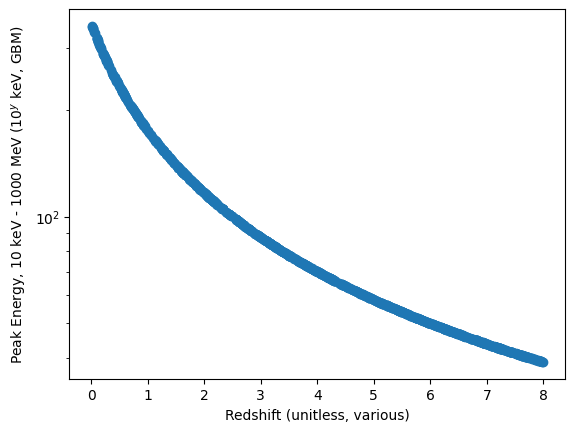

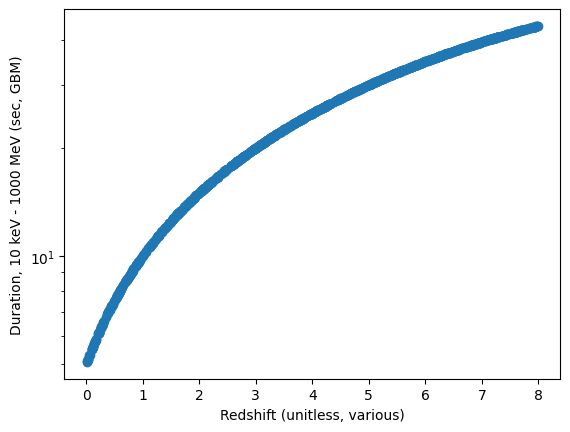

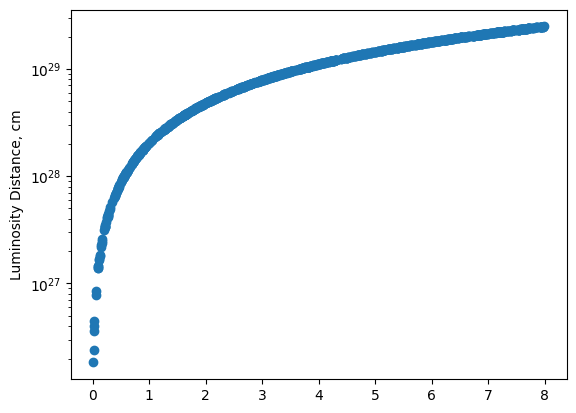

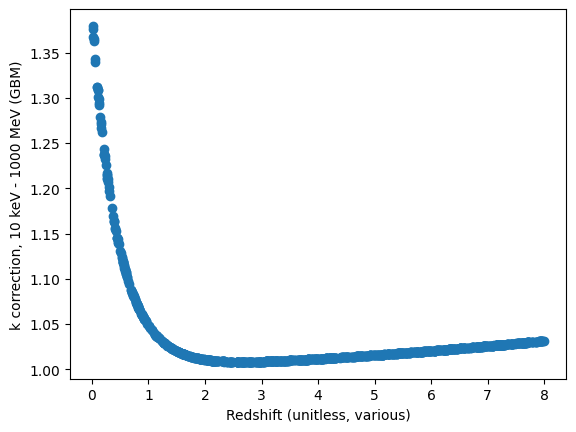

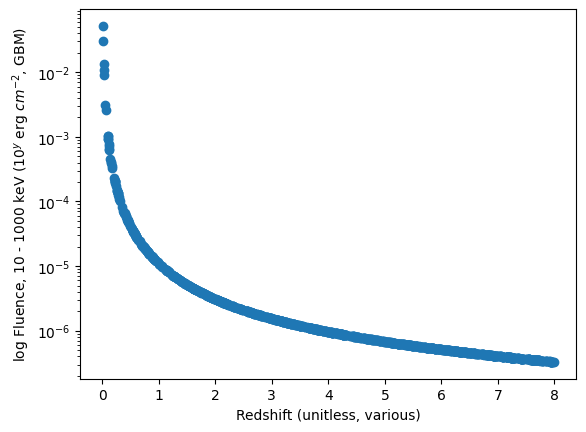

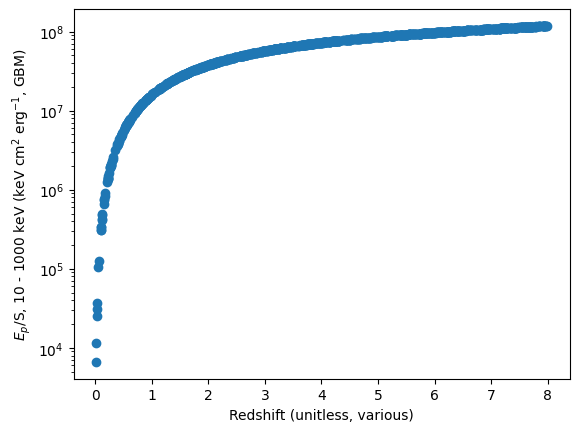

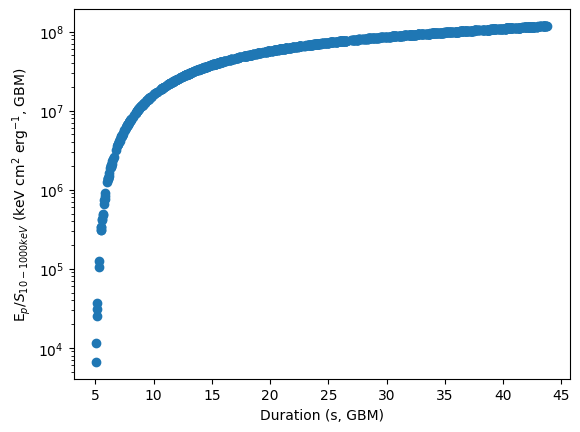

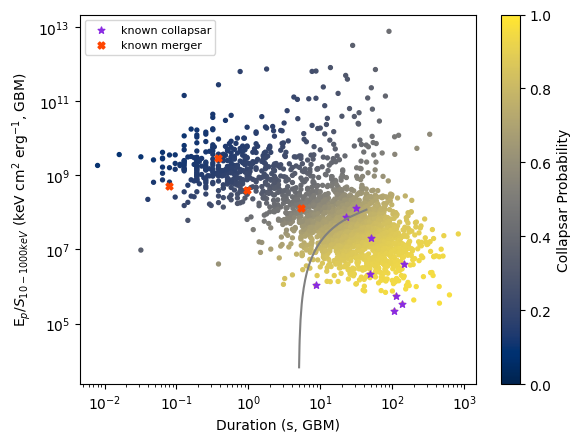

In [4]:
def Band_function (variable, break_E, index_1, index_2):
    index_1=abs(index_1)
    index_2=abs(index_2)
    value=np.where(variable < ((index_1-index_2)*break_E)/(index_1), \
        ((variable/100)**index_2)*np.exp(index_2-index_1)*(((index_1-index_2)*\
        break_E)/(100*(index_1)))**(index_1-index_2), ((variable/100)**index_1)*\
        np.exp(-((index_1)*variable)/break_E))
    return np.real(value)
def k_func(p_1, p_2, peak_E_guess, z_sim):
    low_e_range=[10, 1000]
    high_e_range=[1/(1+z_sim), 10000/(1+z_sim)]
    denominator=scipy.integrate.quad(lambda x: Band_function(x, peak_E_guess, p_1, p_2), \
                               low_e_range[0], low_e_range[1]) #Band
    numerator=scipy.integrate.quad(lambda x: Band_function(x, peak_E_guess, p_1, p_2), \
                             high_e_range[0], high_e_range[1]) #Band
    k=numerator[0]/denominator[0]
    return k
from scipy.special import erfinv
def lower_limit_finder(duration):
    #totally not written by running it in wolfram-alpha's web version a bunch of times first ;)
    lower_limit=0.398942*np.exp(-erfinv(0.9*duration**2)/duration**4)/duration
    return lower_limit
########
from astropy.cosmology import FlatLambdaCDM
cosmo = FlatLambdaCDM(H0=70, Om0=0.3)
import astropy.units as u
########
if 'fluence_mod' in locals():
    del(fluence_mod, t90_stretched, peak_E_stretched, k_corrections, actual_t90, d_lum)
########
orig_t90=5; #this is certainly a short GRB
bkgd_cutoff=0.5 #counts/(cm^2 s), this is the value for GBM
peak_E_guess= 350 #keV, it's just sort of back of the envelope given what's in the catalog
# avg_counts=7.5 #counts/(cm^2 s), because when I looked through that catalog, the peak values were like... 5-10
# speed_light=3e10 #now in cm/s
# H_0=70*10**5/(3.086e24)
z_sim=np.random.uniform(low = 1, high = 800, size=1000)/100 #pick one random redshift that ranges from v close to v far away
z_sim=np.sort(z_sim)
# print(z_sim)
# z_sim=np.zeros(1)
p_1=-0.800 #0.674 #guessed based on the catalog when I filtered out only the Band-fitted bursts shorter than 5 seconds
p_2=-2.76 # similar to the last one
E_iso_rest=3e52 #ergs. IDK, it's just a guesstimate of how bright merger GRBs tend to be based on Minaev and Pozanenko 2019
# counts_stretched=avg_counts/t90_stretched
lower_limit=lower_limit_finder(orig_t90)
t90_stretched=np.zeros(len(z_sim))
peak_E_stretched=np.zeros(len(z_sim))
k_corrections=np.zeros(len(z_sim))
fluence_mod=np.zeros(len(z_sim))
actual_t90=np.zeros(len(z_sim))
d_lum=np.zeros(len(z_sim))
for i in range(0, len(z_sim)):
    t90_stretched[i]=(1+z_sim[i])*orig_t90*(1+0*np.random.normal()) #I know this to be the correct way to calculate the observed t90
    peak_E_stretched[i]=(1+z_sim[i])**(-1)*peak_E_guess*(1+0*np.random.normal()) #I suspect this to be the correct way to calculate the observed energy
    def normal_func(x):
         return scipy.stats.norm.pdf(x, 0, t90_stretched[i])-lower_limit
    t90_limits=scipy.optimize.fsolve(normal_func, [-100, 100])
    inty=scipy.integrate.quad(lambda x: scipy.stats.norm.pdf(x, 0, t90_stretched[i]), min(t90_limits), max(t90_limits)) #this gets you something approximating how much of 
    #t90 was actually observed. So 90% at z=0 and it goes down as the burst gets further away
    actual_t90[i]=inty[0]*t90_stretched[i] #this should be the observed amount of time 
    # (aka, if we start with 90%, this should decrease to like 40% and so on)
    # d_lum[i]=((2*speed_light)/H_0)*(1-np.sqrt(1/(1+z_sim[i])))*(1+z_sim[i]) #luminosity distance. Hopefully in cm
    d_lum[i]=cosmo.luminosity_distance(z_sim[i])/u.Mpc*3.0856776e+24
    k_corrections[i]=k_func(p_1, p_2, peak_E_stretched[i], z_sim[i])
    obs_flu=E_iso_rest*(1+z_sim[i])/(4*np.pi*k_corrections[i]*d_lum[i]**2) # now the scale is about right for the observed fluence, at least
    fluence_mod[i]=obs_flu*(1+0*np.random.normal())*inty[0] #I think this stands for modulated fluence or something. Anyway, the answers make sense
    # print("The redshift is {} and the predicted fluence is {}".format(z_sim[i], fluence_mod[i]))
technically_works=np.column_stack((peak_E_stretched/fluence_mod, actual_t90, d_lum, peak_E_stretched, fluence_mod,\
                                    k_corrections, z_sim)) #it does
sim_data=pd.DataFrame(technically_works, columns=["Peak_E_over_Flu", "t90", "D_Lum", "Peak_E", "Fluence", "k_corrections", "Redshift"])
xx3=sim_data['Peak_E_over_Flu'].values
xx4=sim_data['t90'].values
Xtest_2=np.vstack((xx3,xx4)).T
p_3=model.predict_proba(Xtest_2)
plt.figure()
pp=plt.scatter(sim_data['Redshift'], sim_data['Peak_E'])#,c=p_3[:,1],s=8,cmap='cividis')
plt.xlabel('Redshift (unitless, various)')
plt.ylabel('Peak Energy, 10 keV - 1000 MeV (10$^y$ keV, GBM)')
plt.yscale('log')
#plt.colorbar(pp,label='Collapsar Probability')
plt.show()
plt.figure()
pp=plt.scatter(sim_data['Redshift'], sim_data['t90'])#,c=p_3[:,1],s=8,cmap='cividis')
plt.xlabel('Redshift (unitless, various)')
plt.ylabel('Duration, 10 keV - 1000 MeV (sec, GBM)')
plt.yscale('log')
#plt.colorbar(pp,label='Collapsar Probability')
plt.show()
plt.figure()
pp=plt.scatter(sim_data['Redshift'], sim_data['D_Lum'])
plt.ylabel('Luminosity Distance, cm')
plt.yscale('log')
plt.show()
plt.figure()
pp=plt.scatter(sim_data['Redshift'],sim_data['k_corrections'])#,c=p_3[:,1],s=8,cmap='cividis')
plt.xlabel('Redshift (unitless, various)')
plt.ylabel('k correction, 10 keV - 1000 MeV (GBM)')
#plt.colorbar(pp,label='Collapsar Probability')
plt.show()
plt.figure()
pp=plt.scatter(sim_data['Redshift'],sim_data['Fluence'])#,c=p_3[:,1],s=8,cmap='cividis')
plt.xlabel('Redshift (unitless, various)')
plt.ylabel('log Fluence, 10 - 1000 keV (10$^y$ erg $cm^{-2}$, GBM)')
#plt.colorbar(pp,label='Collapsar Probability')
plt.yscale('log')
plt.show()
plt.figure()
pp=plt.scatter(sim_data['Redshift'],xx3)#,c=p_3[:,1],s=8,cmap='cividis')
plt.xlabel('Redshift (unitless, various)')
plt.ylabel('$E_p$/S, 10 - 1000 keV (keV cm$^{2}$ erg$^{-1}$, GBM)')
#plt.colorbar(pp,label='Collapsar Probability')
plt.yscale('log')
plt.show()
plt.figure()
pp=plt.scatter(xx4,xx3)#,c=p_3[:,1],s=8,cmap='cividis')
plt.xlabel('Duration (s, GBM)')
plt.ylabel('E$_p$/$S_{10 - 1000 keV}$ (keV cm$^{2}$ erg$^{-1}$, GBM)')
plt.yscale('log')
#plt.colorbar(pp,label='Collapsar Probability')
plt.show()
##
plt.figure()
pp=plt.scatter(10**xx2, 10**xx1,c=p[:,1],s=8,cmap='cividis', vmin=0, vmax=1)
plt.colorbar(pp,label='Collapsar Probability')
pp=plt.plot(xx4, xx3, c='0.5',  marker=' ', linestyle='-')#,c=p_3[:,1],s=8,cmap='cividis')
plt.scatter(10**dfc['t90'], 10**dfc['Peak_E_over_Flu'],c='blueviolet',label='known collapsar',s=25, marker="*")
plt.scatter(10**dfm['t90'], 10**dfm['Peak_E_over_Flu'],c='orangered',label='known merger',s=25, marker="X")
plt.legend(loc="upper left", prop={'size': 8})
plt.xlabel('Duration (s, GBM)')
plt.ylabel('E$_p$/$S_{10 - 1000 keV}$ (keV cm$^{2}$ erg$^{-1}$, GBM)')
plt.xscale('log')
plt.yscale('log')
#plt.colorbar(pp,label='Collapsar Probability')
plt.show()

In [5]:
########
if 'fluence_mod' in locals():
    del(fluence_mod, t90_stretched, peak_E_stretched, k_corrections, actual_t90, d_lum)
########
t_90_list=[0.05, 0.3, 3, 9, 27]
n=1000
p_5=np.zeros([n, 2, 5])
t90s=np.zeros([n, 5])
E_p_Ss=np.zeros([n, 5])
for j in range(0, 5):
    orig_t90=t_90_list[j]; #this could be a number of GRB types
    bkgd_cutoff=0.5 #counts/(cm^2 s), this is the value for GBM
    peak_E_guess= 350 #keV, it's just sort of back of the envelope given what's in the catalog
    # avg_counts=7.5 #counts/(cm^2 s), because when I looked through that catalog, the peak values were like... 5-10
    # speed_light=3e10 #now in cm/s
    # H_0=70*10**5/(3.086e24)
    z_sim=np.random.uniform(low = 1, high = 800, size=n)/100 #pick one random redshift that ranges from v close to v far away
    z_sim=np.sort(z_sim)
    # z_sim=np.zeros(1)
    p_1=-0.800 #0.674 #guessed based on the catalog when I filtered out only the Band-fitted bursts shorter than 5 seconds
    p_2=-2.76 # similar to the last one
    E_iso_rest=3e52 #ergs. IDK, it's just a guesstimate of how bright merger GRBs tend to be based on Minaev and Pozanenko 2019
    # counts_stretched=avg_counts/t90_stretched
    lower_limit=lower_limit_finder(orig_t90)
    t90_stretched=np.zeros(len(z_sim))
    peak_E_stretched=np.zeros(len(z_sim))
    k_corrections=np.zeros(len(z_sim))
    fluence_mod=np.zeros(len(z_sim))
    actual_t90=np.zeros(len(z_sim))
    d_lum=np.zeros(len(z_sim))
    for i in range(0, len(z_sim)):
        t90_stretched[i]=(1+z_sim[i])*orig_t90*(1+0*np.random.normal()) #I know this to be the correct way to calculate the observed t90
        peak_E_stretched[i]=(1+z_sim[i])**(-1)*peak_E_guess*(1+0*np.random.normal()) #I suspect this to be the correct way to calculate the observed energy
        def normal_func(x):
            return scipy.stats.norm.pdf(x, 0, t90_stretched[i])-lower_limit
        t90_limits=scipy.optimize.fsolve(normal_func, [-100, 100])
        inty=scipy.integrate.quad(lambda x: scipy.stats.norm.pdf(x, 0, t90_stretched[i]), min(t90_limits), max(t90_limits)) #this gets you something approximating how much of 
        #t90 was actually observed. So 90% at z=0 and it goes down as the burst gets further away
        actual_t90[i]=inty[0]*t90_stretched[i] #this should be the observed amount of time 
        # (aka, if we start with 90%, this should decrease to like 40% and so on)
        # d_lum[i]=((2*speed_light)/H_0)*(1-np.sqrt(1/(1+z_sim[i])))*(1+z_sim[i]) #luminosity distance. Hopefully in cm
        d_lum[i]=cosmo.luminosity_distance(z_sim[i])/u.Mpc*3.0856776e+24
        k_corrections[i]=k_func(p_1, p_2, peak_E_stretched[i], z_sim[i])
        obs_flu=E_iso_rest*(1+z_sim[i])/(4*np.pi*k_corrections[i]*d_lum[i]**2) # now the scale is about right for the observed fluence, at least
        fluence_mod[i]=obs_flu*(1+0*np.random.normal())*inty[0] #I think this stands for modulated fluence or something. Anyway, the answers make sense
        # print("The redshift is {} and the predicted fluence is {}".format(z_sim[i], fluence_mod[i]))
    technically_works=np.column_stack((peak_E_stretched/fluence_mod, actual_t90, d_lum, peak_E_stretched, fluence_mod,\
                                        k_corrections, z_sim)) #it does
    sim_data=pd.DataFrame(technically_works, columns=["Peak_E_over_Flu", "t90", "D_Lum", "Peak_E", "Fluence", "k_corrections", "Redshift"])
    xx3=sim_data['Peak_E_over_Flu'].values
    xx4=sim_data['t90'].values
    # Xtest_2=np.vstack((xx3,xx4)).T
    # p_hold=model.predict_proba(Xtest_2)
    # p_5[:,:,j]=p_hold
    t90s[:,j]=xx4
    E_p_Ss[:,j]=xx3
###
plt.figure()
pp=plt.scatter(10**xx2, 10**xx1,c=p[:,1],s=8,cmap='cividis', vmin=0, vmax=1)
plt.colorbar(pp,label='Collapsar Probability')
pp=plt.plot(t90s[:,0], E_p_Ss[:,0], c='0.3', label='$t_{90,0}$ = 0.05s', linestyle='-', linewidth=5)#,s=25)#,c=p_3[:,1],s=8,cmap='cividis')
pp=plt.plot(t90s[:,1], E_p_Ss[:,1], c='0.45', label='$t_{90,0}$ = 0.3s', linestyle='-', linewidth=5)#,s=25)
pp=plt.plot(t90s[:,2], E_p_Ss[:,2], c='0.6', label='$t_{90,0}$ = 3s', linestyle='-', linewidth=5)#,s=25)
pp=plt.plot(t90s[:,3], E_p_Ss[:,3], c='0.75', label='$t_{90,0}$ = 9s', linestyle='-', linewidth=5)#,s=25)
pp=plt.plot(t90s[:,4], E_p_Ss[:,4], c='0.9', label='$t_{90,0}$ = 27s', linestyle='-', linewidth=5)#,s=25)
plt.text(0.013, 10**5, '0.05s', c='0.3')
plt.text(0.1, 10**6, '0.3s', c='0.3')
plt.text(1.3, 10**5, '3s', c='0.3')
plt.text(5, 10**6, '9s', c='0.3')
plt.text(11, 10**5, '27s', c='0.3')
plt.axvline(x=4.2, c="green").set_linestyle('--')
plt.text(1.3, 10**4, '4.2s', c='green')
plt.scatter(10**dfc['t90'], 10**dfc['Peak_E_over_Flu'],c='blueviolet',label='known collapsar',s=25, marker="*")
plt.scatter(10**dfm['t90'], 10**dfm['Peak_E_over_Flu'],c='orangered',label='known merger',s=25, marker="X")
# plt.legend(loc="upper left", prop={'size': 8})
plt.xlabel('Duration (s, GBM)')
plt.ylabel('E$_p$/$S_{10 - 1000 keV}$ (keV cm$^{2}$ erg$^{-1}$, GBM)')
plt.xscale('log')
plt.yscale('log')
#plt.colorbar(pp,label='Collapsar Probability')
plt.show()

/var/folders/v6/ssr7c_td4kz0ccw4r9cyww60r14wbw/T/ipykernel_98725/430678718.py:5: RuntimeWarning: invalid value encountered in double_scalars
  ((variable/100)**index_2)*np.exp(index_2-index_1)*(((index_1-index_2)*\
/Users/nnuessle/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


KeyboardInterrupt: 

/var/folders/v6/ssr7c_td4kz0ccw4r9cyww60r14wbw/T/ipykernel_98725/766305817.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_bursts_with_z['Redshift']=matched_zs


True


/Users/nnuessle/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nnuessle/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nnuessle/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nnuessle/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nnuessle/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/nnuessle/opt/anaconda3/lib/python3.8/site-packages/seaborn/dist

<Figure size 640x480 with 0 Axes>

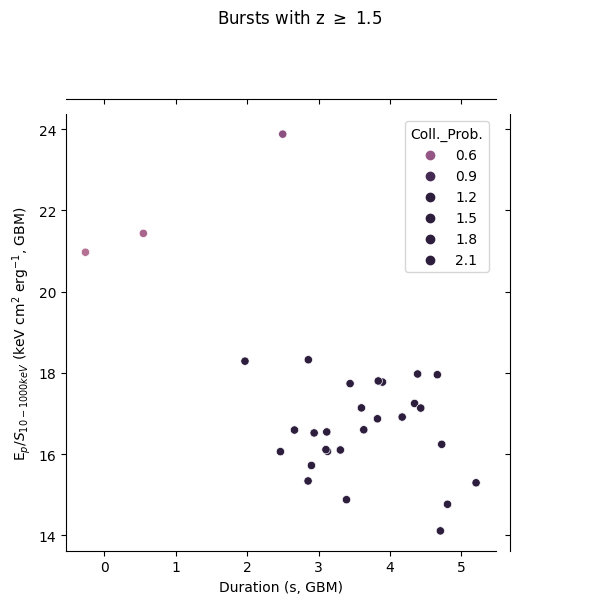

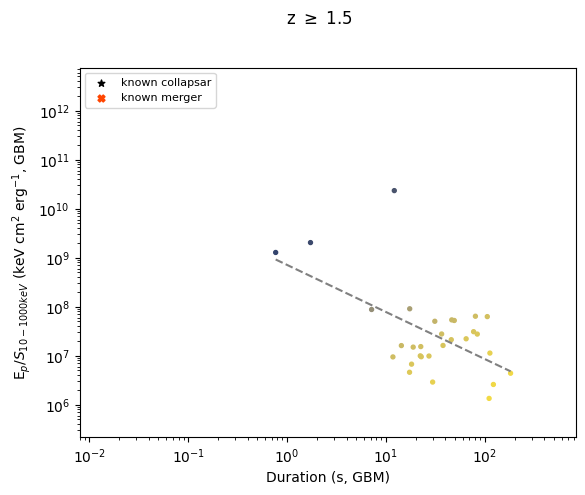

30
the line of best fit is (-0.9610016302735619 +/- 0.2629358520070197)x + (8.853233555497859+/- 0.40779797859945377)


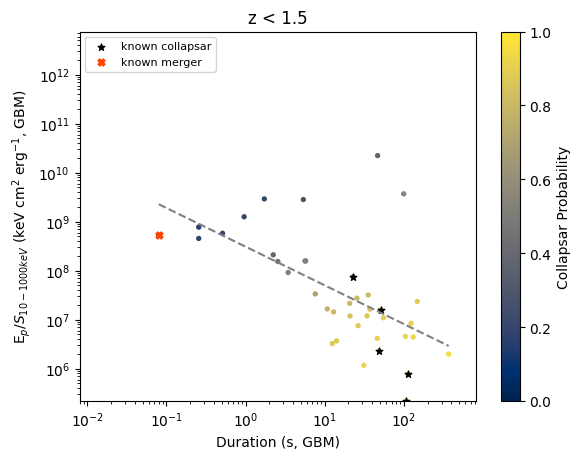

39
the line of best fit is (-0.78920961191072 +/- 0.17559884101858203)x + (8.490653246826344+/- 0.25096941268095774)


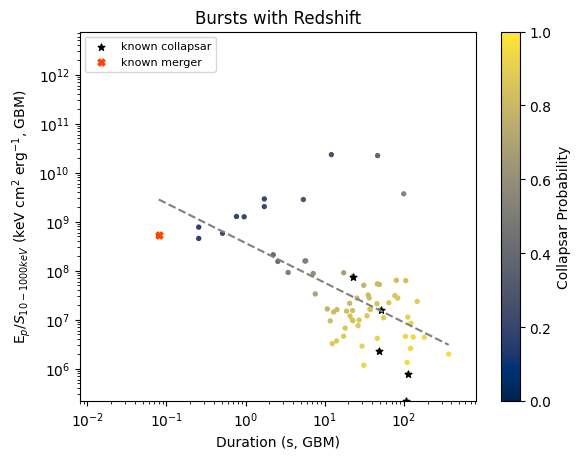

69
the line of best fit is (-0.8096835310931084 +/- 0.13765159174688923)x + (8.565317114158189+/- 0.20418824706115163)


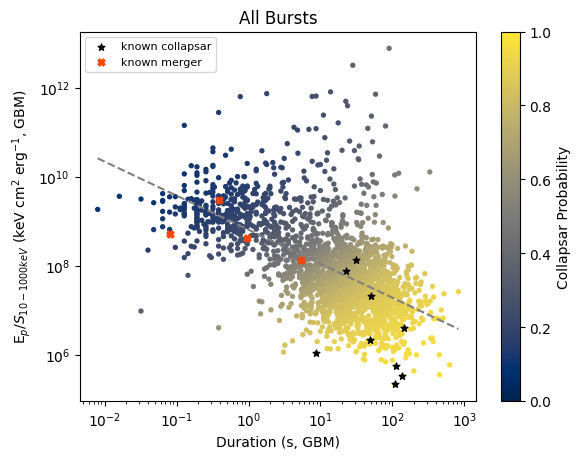

2310
the line of best fit is (-0.7639183523239481 +/- 0.02100142380510735)x + (8.810143374482342+/- 0.028857465862347605)


In [7]:
Full_Data=pd.read_csv("Goldstein_Full_DataSet_W_Name.csv")
Old_Redshift_Data=pd.read_csv("Goldstein_Redshift_AG_Full_DataSet_W_Name.csv")
non_swift_redshifts=pd.read_excel("/Users/nnuessle/Documents/Work/burst_matching_algorithm/actual_paper/prompt-and-afterglow-matching/edited_non_Swift_redshifts.xlsx")
Bursts_with_z =[s.strip('GRB') for s in non_swift_redshifts['GRB Name']] #this removes every time it says "GRB" in a GRB name
zs_of_bursts = [s.strip("[^0-9-hp?<]") for s in non_swift_redshifts['zc']] #This probably strips out too much, but these numbers should be easier for the computer to \
#interpret. The main thing lost is that many of these numbers are upper limits, but I couldn't find any pairs or ranges that it eliminates
new_redshifts=np.isin(Full_Data['Name'], Bursts_with_z)
new_bursts_with_z=Full_Data[new_redshifts]
matched_zs=np.zeros(len(new_bursts_with_z))
custom_palette = sns.color_palette("cividis", as_cmap=True)
k=0
for i in new_bursts_with_z.index:
    for j in range(0, len(Bursts_with_z)):
        if (new_bursts_with_z.at[i, "Name"]==int(Bursts_with_z[j])):
            matched_zs[k]=zs_of_bursts[j] #very inefficient, but it does work
            k=k+1
new_bursts_with_z['Redshift']=matched_zs
old_bursts_with_z=Old_Redshift_Data #so here's all the ones matched using sweeft
joint_bursts_with_z= pd.concat([new_bursts_with_z, old_bursts_with_z]) #and we glue them together
print(len(set(joint_bursts_with_z['Name'])) == len(joint_bursts_with_z['Name'])) 
#this just verifies that every burst isn't a repeat of any other one--you want it to return true
xx1_temp=10**(Goldstein_data['Peak_E_over_Flu'].values)
xx2_temp=10**(Goldstein_data['t90'].values)
####
high_z_mask=np.where(joint_bursts_with_z['Redshift']>=1.5)[0]
high_joint_bursts=joint_bursts_with_z.iloc[high_z_mask, :]
xx5=high_joint_bursts['Peak_E_over_Flu'].values
xx6=high_joint_bursts['t90'].values
Xtest_3=np.vstack((xx5,xx6)).T
p_4=model.predict_proba(Xtest_3)
e0, V0 = np.polyfit(xx6, xx5, 1, cov=True)
line_x=np.logspace(min(xx6), max(xx6), num=50, endpoint=True)
line_y=10**(e0[0]*(np.log10(line_x))+e0[1])
xx5=10**(high_joint_bursts['Peak_E_over_Flu'].values)
xx6=10**(high_joint_bursts['t90'].values)
probstat=10**(p_4[:,1])
dfc=high_joint_bursts[high_joint_bursts['Classification.']=='collapsar']
dfm=high_joint_bursts[high_joint_bursts['Classification.']=='merger']
frame = pd.DataFrame(np.vstack((xx6,xx5, probstat)).T, columns=['t90', 'Peak_E_over_Flu', 'Coll._Prob.'])
plt.figure()
# plt.errorbar(y=collapsar_EP_hypo_Data['Peak E. over Flue.'], x=collapsar_EP_hypo_Data['t90'], yerr=collapsar_EP_hypo_Data['E_P_Over_S_Err'], xerr=collapsar_EP_hypo_Data['t90_err'], \
#              ls='none', color='blue', marker="*", label="Known Collapsar")
#plt.scatter(xx6,xx5,c=p_4[:,1],s=8,cmap='cividis', vmin=0, vmax=1)
p1=sns.jointplot(x='t90', y='Peak_E_over_Flu', hue='Coll._Prob.', hue_norm=(0,1), data=np.log(frame), ci=99, marginal_kws={'log_scale': False})
#plt.scatter(10**dfc['t90'], 10**dfc['Peak_E_over_Flu'],c='black',label='known collapsar',s=25, marker="*")
#plt.scatter(10**dfm['t90'], 10**dfm['Peak_E_over_Flu'],c='orangered',label='known merger',s=25, marker="X")
#plt.plot(line_x, line_y, linestyle="dashed", color='grey')
#plt.legend(loc="upper left", prop={'size': 8})
p1.set_axis_labels(xlabel='Duration (s, GBM)', ylabel='E$_p$/$S_{10 - 1000 keV}$ (keV cm$^{2}$ erg$^{-1}$, GBM)')
# # plt.colorbar(pp,label='Collapsar Probability')
# plt.ylim(ymin=sorted(xx1_temp)[0]-1, ymax=sorted(xx1_temp)[-1]+1)
# plt.xlim(xmin=float(sorted(xx2_temp)[0]), xmax=float(sorted(xx2_temp)[-1]+1))
# plt.xscale('log')
# plt.yscale('log')
plt.suptitle(t="Bursts with z $\geq$ 1.5", y=1)
plt.show()
plt.figure()
# plt.errorbar(y=collapsar_EP_hypo_Data['Peak E. over Flue.'], x=collapsar_EP_hypo_Data['t90'], yerr=collapsar_EP_hypo_Data['E_P_Over_S_Err'], xerr=collapsar_EP_hypo_Data['t90_err'], \
#              ls='none', color='blue', marker="*", label="Known Collapsar")
plt.scatter(xx6,xx5,c=p_4[:,1],s=8,cmap='cividis', vmin=0, vmax=1)
plt.scatter(10**dfc['t90'], 10**dfc['Peak_E_over_Flu'],c='black',label='known collapsar',s=25, marker="*")
plt.scatter(10**dfm['t90'], 10**dfm['Peak_E_over_Flu'],c='orangered',label='known merger',s=25, marker="X")
plt.plot(line_x, line_y, linestyle="dashed", color='grey')
plt.legend(loc="upper left", prop={'size': 8})
plt.xlabel('Duration (s, GBM)')
plt.ylabel('E$_p$/$S_{10 - 1000 keV}$ (keV cm$^{2}$ erg$^{-1}$, GBM)')
# plt.colorbar(pp,label='Collapsar Probability')
plt.ylim(ymin=sorted(xx1_temp)[0]-1, ymax=sorted(xx1_temp)[-1]+1)
plt.xlim(xmin=float(sorted(xx2_temp)[0]), xmax=float(sorted(xx2_temp)[-1]+1))
plt.xscale('log')
plt.yscale('log')
plt.suptitle(t="z $\geq$ 1.5", y=1)
plt.show()
print(len(high_joint_bursts))
print("the line of best fit is ({} +/- {})x + ({}+/- {})".format(e0[0], np.sqrt(V0[0][0]), e0[1], np.sqrt(V0[1][1])))
##
low_z_mask=np.where(joint_bursts_with_z['Redshift']<1.5)[0]
low_joint_bursts=joint_bursts_with_z.iloc[low_z_mask, :]
xx5=low_joint_bursts['Peak_E_over_Flu'].values
xx6=low_joint_bursts['t90'].values
Xtest_3=np.vstack((xx5,xx6)).T
p_4=model.predict_proba(Xtest_3)
e1, V1 = np.polyfit(xx6, xx5, 1, cov=True)
line_x=np.logspace(min(xx6), max(xx6), num=50, endpoint=True)
line_y=10**(e1[0]*(np.log10(line_x))+e1[1])
xx5=10**(low_joint_bursts['Peak_E_over_Flu'].values)
xx6=10**(low_joint_bursts['t90'].values)
dfc=low_joint_bursts[low_joint_bursts['Classification.']=='collapsar']
dfm=low_joint_bursts[low_joint_bursts['Classification.']=='merger']
plt.figure()
pp=plt.scatter(xx6,xx5,c=p_4[:,1],s=8,cmap='cividis', vmin=0, vmax=1)
# plt.errorbar(y=collapsar_EP_hypo_Data['Peak E. over Flue.'], x=collapsar_EP_hypo_Data['t90'], yerr=collapsar_EP_hypo_Data['E_P_Over_S_Err'], xerr=collapsar_EP_hypo_Data['t90_err'], \
#              ls='none', color='blue', marker="*", label="Known Collapsar")
plt.scatter(10**dfc['t90'], 10**dfc['Peak_E_over_Flu'],c='black',label='known collapsar',s=25, marker="*")
plt.scatter(10**dfm['t90'], 10**dfm['Peak_E_over_Flu'],c='orangered',label='known merger',s=25, marker="X")
plt.plot(line_x, line_y, linestyle="dashed", color='grey')
plt.legend(loc="upper left", prop={'size': 8})
plt.xlabel('Duration (s, GBM)')
plt.ylabel('E$_p$/$S_{10 - 1000 keV}$ (keV cm$^{2}$ erg$^{-1}$, GBM)')
plt.colorbar(pp,label='Collapsar Probability')
plt.ylim(ymin=sorted(xx1_temp)[0]-1, ymax=sorted(xx1_temp)[-1]+1)
plt.xlim(xmin=float(sorted(xx2_temp)[0]), xmax=float(sorted(xx2_temp)[-1]+1))
plt.xscale('log')
plt.yscale('log')
plt.title("z < 1.5")
plt.show()
print(len(low_joint_bursts))
print("the line of best fit is ({} +/- {})x + ({}+/- {})".format(e1[0], np.sqrt(V1[0][0]), e1[1], np.sqrt(V1[1][1])))
##
xx5=joint_bursts_with_z['Peak_E_over_Flu'].values
xx6=joint_bursts_with_z['t90'].values
Xtest_3=np.vstack((xx5,xx6)).T
p_4=model.predict_proba(Xtest_3)
e2, V2 = np.polyfit(xx6, xx5, 1, cov=True)
line_x=np.logspace(min(xx6), max(xx6), num=50, endpoint=True)
line_y=10**(e2[0]*(np.log10(line_x))+e2[1])
xx5=10**(joint_bursts_with_z['Peak_E_over_Flu'].values)
xx6=10**(joint_bursts_with_z['t90'].values)
dfc=joint_bursts_with_z[joint_bursts_with_z['Classification.']=='collapsar']
dfm=joint_bursts_with_z[joint_bursts_with_z['Classification.']=='merger']
plt.figure()
pp=plt.scatter(xx6,xx5,c=p_4[:,1],s=8,cmap='cividis', vmin=0, vmax=1)
# plt.errorbar(y=collapsar_EP_hypo_Data['Peak E. over Flue.'], x=collapsar_EP_hypo_Data['t90'], yerr=collapsar_EP_hypo_Data['E_P_Over_S_Err'], xerr=collapsar_EP_hypo_Data['t90_err'], \
#              ls='none', color='blue', marker="*", label="Known Collapsar")
plt.scatter(10**dfc['t90'], 10**dfc['Peak_E_over_Flu'],c='black',label='known collapsar',s=25, marker="*")
plt.scatter(10**dfm['t90'], 10**dfm['Peak_E_over_Flu'],c='orangered',label='known merger',s=25, marker="X")
plt.plot(line_x, line_y, linestyle="dashed", color='grey')
plt.legend(loc="upper left", prop={'size': 8})
plt.xlabel('Duration (s, GBM)')
plt.ylabel('E$_p$/$S_{10 - 1000 keV}$ (keV cm$^{2}$ erg$^{-1}$, GBM)')
plt.colorbar(pp,label='Collapsar Probability')
plt.ylim(ymin=sorted(xx1_temp)[0]-1, ymax=sorted(xx1_temp)[-1]+1)
plt.xlim(xmin=float(sorted(xx2_temp)[0]), xmax=float(sorted(xx2_temp)[-1]+1))
plt.xscale('log')
plt.yscale('log')
plt.title("Bursts with Redshift")
plt.show()
print(len(joint_bursts_with_z))
print("the line of best fit is ({} +/- {})x + ({}+/- {})".format(e2[0], np.sqrt(V2[0][0]), e2[1], np.sqrt(V2[1][1])))
##
xx1=Goldstein_data['Peak_E_over_Flu'].values
xx2=Goldstein_data['t90'].values
Xtest_3=np.vstack((xx1,xx2)).T
p_4=model.predict_proba(Xtest_3)
e3, V3 = np.polyfit(xx2, xx1, 1, cov=True)
line_x=np.logspace(min(xx2), max(xx2), num=50, endpoint=True)
line_y=10**(e3[0]*(np.log10(line_x))+e3[1])
xx1_temp=10**(Goldstein_data['Peak_E_over_Flu'].values)
xx2_temp=10**(Goldstein_data['t90'].values)
dfc=Goldstein_data[Goldstein_data['Classification.']=='collapsar']
dfm=Goldstein_data[Goldstein_data['Classification.']=='merger']
plt.figure()
pp=plt.scatter(xx2_temp,xx1_temp,c=p[:,1],s=8,cmap='cividis', vmin=0, vmax=1)
# plt.colorbar(pp,label='Collapsar Probability')
plt.scatter(10**dfc['t90'], 10**dfc['Peak_E_over_Flu'],c='black',label='known collapsar',s=25, marker="*")
plt.scatter(10**dfm['t90'], 10**dfm['Peak_E_over_Flu'],c='orangered',label='known merger',s=25, marker="X")
plt.plot(line_x, line_y, linestyle="dashed", color='grey')
plt.legend(loc="upper left", prop={'size': 8})
plt.xlabel('Duration (s, GBM)')
plt.ylabel('E$_p$/$S_{10 - 1000 keV}$ (keV cm$^{2}$ erg$^{-1}$, GBM)')
plt.colorbar(pp,label='Collapsar Probability')
plt.xscale('log')
plt.yscale('log')
plt.title("All Bursts")
plt.show()
print(len(Goldstein_data))
print("the line of best fit is ({} +/- {})x + ({}+/- {})".format(e3[0], np.sqrt(V3[0][0]), e3[1], np.sqrt(V3[1][1])))

In [8]:
from scipy import stats
#test that low and high are from same pop
print(stats.ttest_ind(low_joint_bursts['Peak_E_over_Flu'].values, high_joint_bursts['Peak_E_over_Flu'].values))
print(stats.ttest_ind(low_joint_bursts['t90'].values, high_joint_bursts['t90'].values))
#test that low and all redshift are from same pop
print(stats.ttest_ind(low_joint_bursts['Peak_E_over_Flu'].values, joint_bursts_with_z['Peak_E_over_Flu'].values))
print(stats.ttest_ind(low_joint_bursts['t90'].values, joint_bursts_with_z['t90'].values))
#test that high and all redshift are from same pop
print(stats.ttest_ind(high_joint_bursts['Peak_E_over_Flu'].values, joint_bursts_with_z['Peak_E_over_Flu'].values))
print(stats.ttest_ind(high_joint_bursts['t90'].values, joint_bursts_with_z['t90'].values))
#test that all redshift and all grbs are from same pop
print(stats.ttest_ind(joint_bursts_with_z['Peak_E_over_Flu'].values, Goldstein_data['Peak_E_over_Flu'].values))
print(stats.ttest_ind(joint_bursts_with_z['t90'].values, Goldstein_data['t90'].values))
###
from statsmodels.stats.power import TTestIndPower
effect = 0.5
alpha = 0.01
power = 0.99
analysis = TTestIndPower()
#test that low and high are from same pop
effect_size=np.mean(low_joint_bursts['Peak_E_over_Flu'].values)-np.mean(high_joint_bursts['Peak_E_over_Flu'].values)/np.std(low_joint_bursts['Peak_E_over_Flu'].values)
ratio=len(high_joint_bursts['Peak_E_over_Flu'].values)/len(low_joint_bursts['Peak_E_over_Flu'].values)
result = analysis.power(effect_size, nobs1=len(low_joint_bursts['Peak_E_over_Flu'].values), alpha=alpha, ratio=ratio)
print(1-result)
effect_size=np.mean(low_joint_bursts['t90'].values)-np.mean(high_joint_bursts['t90'].values)/np.std(low_joint_bursts['t90'].values)
ratio=len(high_joint_bursts['t90'].values)/len(low_joint_bursts['t90'].values)
result = analysis.power(effect_size, nobs1=len(low_joint_bursts['t90'].values), alpha=alpha, ratio=ratio)
print(1-result)
#test that low and all redshift are from same pop
effect_size=np.mean(joint_bursts_with_z['Peak_E_over_Flu'].values)-np.mean(low_joint_bursts['Peak_E_over_Flu'].values)/np.std(joint_bursts_with_z['Peak_E_over_Flu'].values)
ratio=len(low_joint_bursts['Peak_E_over_Flu'].values)/len(joint_bursts_with_z['Peak_E_over_Flu'].values)
result = analysis.power(effect_size, nobs1=len(joint_bursts_with_z['Peak_E_over_Flu'].values), alpha=alpha, ratio=ratio)
print(1-result)
effect_size=np.mean(joint_bursts_with_z['t90'].values)-np.mean(low_joint_bursts['t90'].values)/np.std(joint_bursts_with_z['t90'].values)
ratio=len(low_joint_bursts['t90'].values)/len(joint_bursts_with_z['t90'].values)
result = analysis.power(effect_size, nobs1=len(joint_bursts_with_z['t90'].values), alpha=alpha, ratio=ratio)
print(1-result)
#test that high and all redshift are from same pop
effect_size=np.mean(joint_bursts_with_z['Peak_E_over_Flu'].values)-np.mean(high_joint_bursts['Peak_E_over_Flu'].values)/np.std(joint_bursts_with_z['Peak_E_over_Flu'].values)
ratio=len(high_joint_bursts['Peak_E_over_Flu'].values)/len(joint_bursts_with_z['Peak_E_over_Flu'].values)
result = analysis.power(effect_size, nobs1=len(joint_bursts_with_z['Peak_E_over_Flu'].values), alpha=alpha, ratio=ratio)
print(1-result)
effect_size=np.mean(joint_bursts_with_z['t90'].values)-np.mean(high_joint_bursts['t90'].values)/np.std(joint_bursts_with_z['t90'].values)
ratio=len(high_joint_bursts['t90'].values)/len(joint_bursts_with_z['t90'].values)
result = analysis.power(effect_size, nobs1=len(joint_bursts_with_z['t90'].values), alpha=alpha, ratio=ratio)
print(1-result)
#test that all redshift and all grbs are from same pop
effect_size=np.mean(Goldstein_data['Peak_E_over_Flu'].values)-np.mean(joint_bursts_with_z['Peak_E_over_Flu'].values)/np.std(Goldstein_data['Peak_E_over_Flu'].values)
ratio=len(joint_bursts_with_z['Peak_E_over_Flu'].values)/len(Goldstein_data['Peak_E_over_Flu'].values)
result = analysis.power(effect_size, nobs1=len(Goldstein_data['Peak_E_over_Flu'].values), alpha=alpha, ratio=ratio)
print(1-result)
effect_size=np.mean(Goldstein_data['t90'].values)-np.mean(joint_bursts_with_z['t90'].values)/np.std(Goldstein_data['t90'].values)
ratio=len(joint_bursts_with_z['t90'].values)/len(Goldstein_data['t90'].values)
result = analysis.power(effect_size, nobs1=len(Goldstein_data['t90'].values), alpha=alpha, ratio=ratio)
print(1-result)

Ttest_indResult(statistic=0.5356779410693518, pvalue=0.5939549758288749)
Ttest_indResult(statistic=-1.7553463929773168, pvalue=0.08377099636344951)
Ttest_indResult(statistic=0.27314940925910125, pvalue=0.7852698341063853)
Ttest_indResult(statistic=-0.8612080914156595, pvalue=0.3910673641049718)
Ttest_indResult(statistic=-0.35232816216583246, pvalue=0.7253565229367178)
Ttest_indResult(statistic=1.1780610276160444, pvalue=0.2416543836206348)
Ttest_indResult(statistic=-3.509270249721406, pvalue=0.00045769026937618235)
Ttest_indResult(statistic=1.6814087505725168, pvalue=0.092814912950895)
0.11466150780214701
0.5962242539519633
0.9819682296745852
0.8849960491672428
0.9417677948688759
0.27995041532142084
0.2782136738776142
0.05346815179121156


In [9]:
#and this function right here is why I was not looking forward to it
def proper_k_func(relevant_fermi_data, spectral_model, entry, redshift):
#     pdb.set_trace()
#     if 'low_e_range' in locals():
#         del(low_e_range)
    low_e_range=[10, 1000]
#     if 'high_e_range' in locals():
#         del(high_e_range)
    high_e_range=[1/(1+redshift), 10000/(1+redshift)]
    if spectral_model=='flnc_plaw              ':
        p_1=float(relevant_fermi_data.at[entry, 'flnc_plaw_index'])
        denominator=scipy.integrate.quad(lambda x: power_law(x, p_1), low_e_range[0], \
                              low_e_range[1]) #PL
        numerator=scipy.integrate.quad(lambda x: power_law(x, p_1), high_e_range[0], \
                              high_e_range[1]) #PL
        k=numerator[0]/denominator[0]
        
    elif spectral_model=='flnc_comp              ':
        p_1=float(relevant_fermi_data.at[entry, 'flnc_comp_index'])
        E_break=float(relevant_fermi_data.at[entry, 'flnc_comp_epeak'])
        denominator=scipy.integrate.quad(lambda x:  Compton_PL(x, p_1, E_break), \
                       low_e_range[0], low_e_range[1]) #CPL
        numerator=scipy.integrate.quad(lambda x: Compton_PL(x, p_1, E_break), \
                       high_e_range[0], high_e_range[1]) #CPL
        k=numerator[0]/denominator[0]
        
    elif spectral_model=='flnc_band              ':
        p_1=float(relevant_fermi_data.at[entry, 'flnc_band_alpha'])
        p_2=float(relevant_fermi_data.at[entry, 'flnc_band_beta'])
        E_break=float(relevant_fermi_data.at[entry, 'flnc_band_epeak'])
        denominator=scipy.integrate.quad(lambda x: Band_function(x, E_break, p_1, p_2), \
                       low_e_range[0], low_e_range[1]) #Band
        numerator=scipy.integrate.quad(lambda x: Band_function(x, E_break, p_1, p_2), \
                       high_e_range[0], high_e_range[1]) #Band
        k=numerator[0]/denominator[0]
        
    elif spectral_model=='flnc_sbpl              ':
        p_1=float(relevant_fermi_data.at[entry, 'pflx_sbpl_indx1']) #some doofus left these
        #parameters out of the catalog
        p_2=float(relevant_fermi_data.at[entry, 'pflx_sbpl_indx2'])
        E_break=float(relevant_fermi_data.at[entry, 'pflx_sbpl_brken'])
        smoothen=float(relevant_fermi_data.at[entry, 'pflx_sbpl_brksc'])
        denominator=scipy.integrate.quad(lambda x: Smoothly_Broken_PL(x, E_break, p_1, p_2, smoothen), \
                       low_e_range[0], low_e_range[1])
        numerator=scipy.integrate.quad(lambda x: Smoothly_Broken_PL(x, E_break, p_1, p_2, smoothen),\
                       high_e_range[0], high_e_range[1])
        k=numerator[0]/denominator[0]
        
    else:
        if relevant_fermi_data.at[entry, 'flnc_plaw_index']:
            p_1=float(relevant_fermi_data.at[entry, 'flnc_plaw_index'])
            denominator=scipy.integrate.quad(lambda x: power_law(x, p_1), low_e_range[0], \
                                  low_e_range[1])
            numerator=scipy.integrate.quad(lambda x: power_law(x, p_1), \
                               high_e_range[0], high_e_range[1]) 
            #PL because that's the simplest one, unfortunately
            k=numerator[0]/denominator[0]
        else:
            k=np.NA
    return k

#gotta have these guys too lol
def power_law (variable, index):
    value=variable**index
    return value

def Compton_PL (variable, index, break_E):
    value=np.power(variable, index)*np.exp(-variable/break_E)
    return value

def Band_function (variable, break_E, index_1, index_2):
    index_1=abs(index_1)
    index_2=abs(index_2)
    value=np.where(variable < ((index_1-index_2)*break_E)/(index_1), \
        ((variable/100)**index_2)*np.exp(index_2-index_1)*(((index_1-index_2)*\
        break_E)/(100*(index_1)))**(index_1-index_2), ((variable/100)**index_1)*\
        np.exp(-((index_1)*variable)/break_E))
    return np.real(value)

def Smoothly_Broken_PL (variable, break_E, index_1, index_2, smoothen):
    value=(variable/break_E)**(index_1)*(0.5*(1+(variable/break_E)**(1/smoothen)))**\
    (-(index_1-index_2)/smoothen)
    return value

def z_power_law(variable, index, redshift):
    value=(variable*(1+redshift))**(index)
    return value

/var/folders/v6/ssr7c_td4kz0ccw4r9cyww60r14wbw/T/ipykernel_98725/2990778029.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_bursts_with_z['Redshift']=matched_zs


True


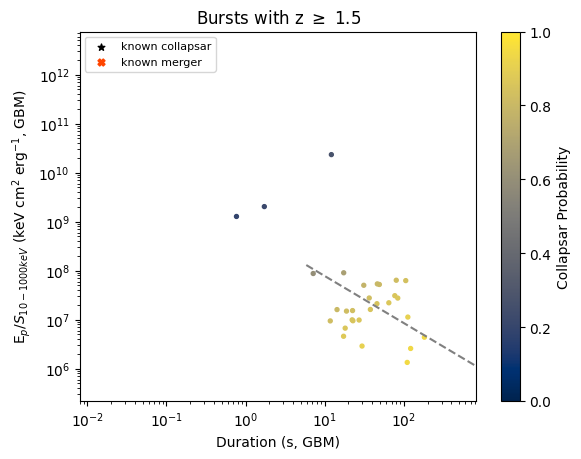

30
the line of best fit is (-0.9610016302735619 +/- 0.2629358520070197)x + (8.853233555497859+/- 0.40779797859945377)


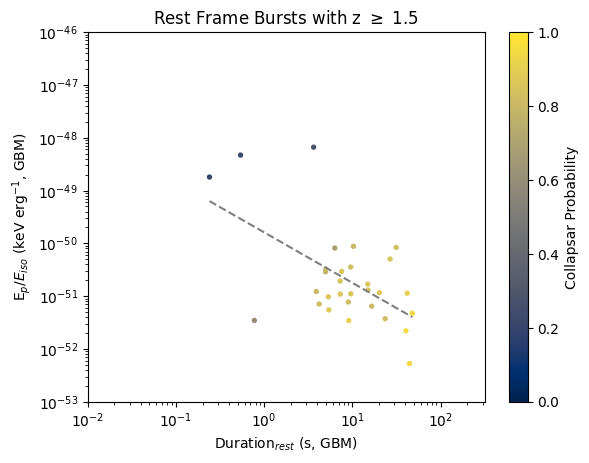

the line of best fit is (-0.9552046371668944 +/- 0.2594586425162953)x + (-49.79231102934436+/- 0.2767923653969306)


/Users/nnuessle/opt/anaconda3/lib/python3.8/site-packages/numpy/core/function_base.py:277: RuntimeWarning: overflow encountered in power
  return _nx.power(base, y)


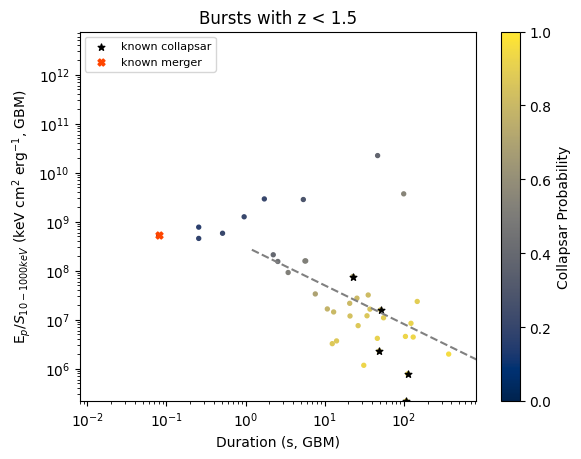

39
the line of best fit is (-0.78920961191072 +/- 0.17559884101858203)x + (8.490653246826344+/- 0.25096941268095774)


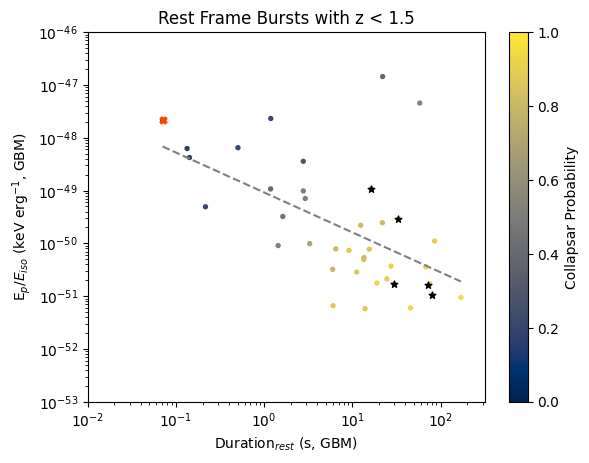

the line of best fit is (-0.7556298433861448 +/- 0.1877834955667566)x + (-49.03653534369471+/- 0.22992425688242843)


/Users/nnuessle/opt/anaconda3/lib/python3.8/site-packages/numpy/core/function_base.py:277: RuntimeWarning: overflow encountered in power
  return _nx.power(base, y)


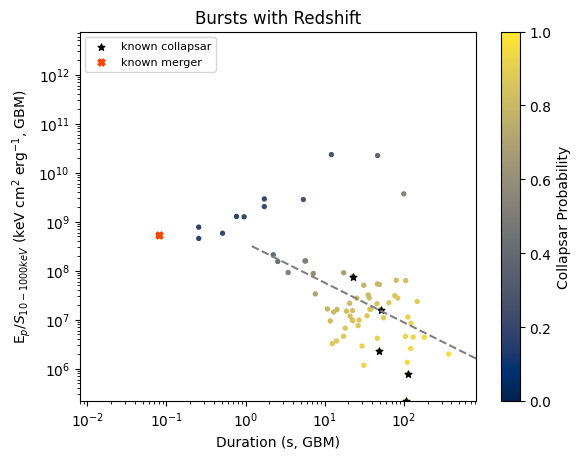

69
the line of best fit is (-0.8096835310931084 +/- 0.13765159174688923)x + (8.565317114158189+/- 0.20418824706115163)


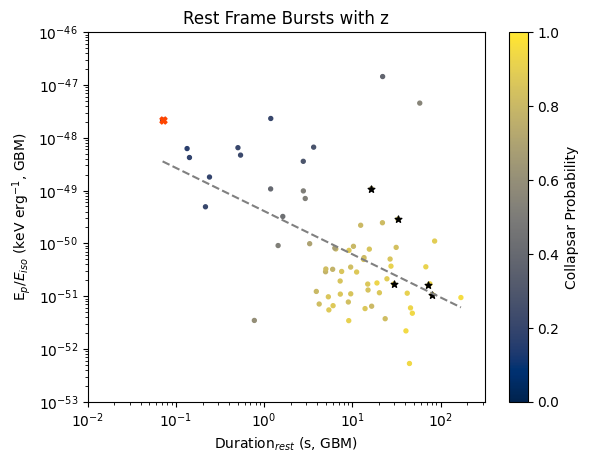

the line of best fit is (-0.8174384378203049 +/- 0.16666993929347607)x + (-49.38929431989738+/- 0.193091343705894)


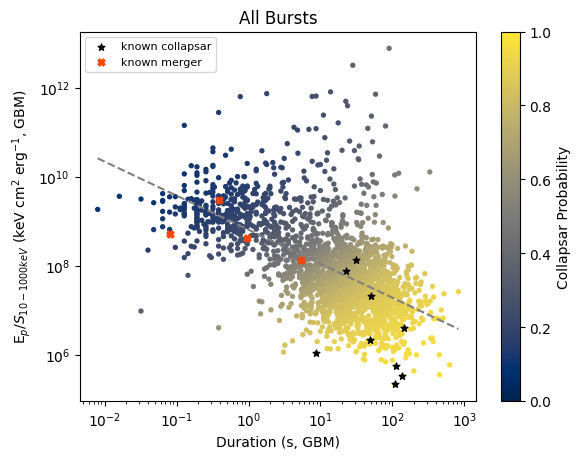

2310
the line of best fit is (-0.7639183523239481 +/- 0.02100142380510735)x + (8.810143374482342+/- 0.028857465862347605)


In [11]:
##Now we're going to move all those bursts to the restframe. God help us all##
##
Full_Data=pd.read_csv("Goldstein_Full_DataSet_W_Name.csv")
Overfilled_Data=pd.read_csv("22_May_2023_Fermi_Data.csv")
Old_Redshift_Data=pd.read_csv("Goldstein_Redshift_AG_Full_DataSet_W_Name.csv")
non_swift_redshifts=pd.read_excel("/Users/nnuessle/Documents/Work/burst_matching_algorithm/actual_paper/prompt-and-afterglow-matching/edited_non_Swift_redshifts.xlsx")
Bursts_with_z =[s.strip('GRB') for s in non_swift_redshifts['GRB Name']] #this removes every time it says "GRB" in a GRB name
zs_of_bursts = [s.strip("[^0-9-hp?<]") for s in non_swift_redshifts['zc']] #This probably strips out too much, but these numbers should be easier for the computer to \
#interpret. The main thing lost is that many of these numbers are upper limits, but I couldn't find any pairs or ranges that it eliminates
new_redshifts=np.isin(Full_Data['Name'], Bursts_with_z)
new_bursts_with_z=Full_Data[new_redshifts]
matched_zs=np.zeros(len(new_bursts_with_z))
k=0
for i in new_bursts_with_z.index:
    for j in range(0, len(Bursts_with_z)):
        if (new_bursts_with_z.at[i, "Name"]==int(Bursts_with_z[j])):
            matched_zs[k]=zs_of_bursts[j] #very inefficient, but it does work
            k=k+1
new_bursts_with_z['Redshift']=matched_zs
old_bursts_with_z=Old_Redshift_Data #so here's all the ones matched using sweeft
joint_bursts_with_z= pd.concat([new_bursts_with_z, old_bursts_with_z]) #and we glue them together
print(len(set(joint_bursts_with_z['Name'])) == len(joint_bursts_with_z['Name'])) 
#this just verifies that every burst isn't a repeat of any other one--you want it to return true
xx1_temp=10**(Goldstein_data['Peak_E_over_Flu'].values)
xx2_temp=10**(Goldstein_data['t90'].values)
####
high_z_mask=np.where(joint_bursts_with_z['Redshift']>=1.5)[0]
high_joint_bursts=joint_bursts_with_z.iloc[high_z_mask, :]
high_joint_bursts.reset_index(inplace=True,drop=True)
xx5=high_joint_bursts['Peak_E_over_Flu'].values
xx6=high_joint_bursts['t90'].values
Xtest_3=np.vstack((xx5,xx6)).T
p_4=model.predict_proba(Xtest_3)
peak_E_narrowed=np.zeros(len(high_joint_bursts))
E_iso_rest_0=np.zeros(len(high_joint_bursts))
t90_narrowed=np.zeros(len(high_joint_bursts))
naked_names=list(map(int, Overfilled_Data["name        "].str.strip('GRB \.')))
j=0
for i in (high_joint_bursts.index):
    peak_E_narrowed[j]=(1+high_joint_bursts.at[i, 'Redshift'])*10**(high_joint_bursts.at[i, 'Peak_E'])
    d_lum=cosmo.luminosity_distance(high_joint_bursts.at[i, 'Redshift'])/u.Mpc*3.0856776e+24
    ticket=np.where(naked_names==high_joint_bursts.at[i, 'Name'])[0][0]
    modello=Overfilled_Data["flnc_best_fitting_model"][ticket]
    k_corrections[j]=proper_k_func(Overfilled_Data, modello, ticket, high_joint_bursts.at[i, 'Redshift'])
    E_iso_rest_0[j]=4*np.pi*((d_lum)**2)*10**(high_joint_bursts.at[i, 'Fluence'])*k_corrections[j]/(1+high_joint_bursts.at[i, 'Redshift'])
    t90_narrowed[j]=(1+high_joint_bursts.at[i, 'Redshift'])**(-1)*10**(high_joint_bursts.at[i, 't90'])
    j=j+1
e0, V0 = np.polyfit(xx6, xx5, 1, cov=True)
xx5=10**(high_joint_bursts['Peak_E_over_Flu'].values)
xx6=10**(high_joint_bursts['t90'].values)
dfc=high_joint_bursts[high_joint_bursts['Classification.']=='collapsar']
dfm=high_joint_bursts[high_joint_bursts['Classification.']=='merger']
plt.figure()
pp=plt.scatter(xx6,xx5,c=p_4[:,1],s=8,cmap='cividis', vmin=0, vmax=1)
# plt.errorbar(y=collapsar_EP_hypo_Data['Peak E. over Flue.'], x=collapsar_EP_hypo_Data['t90'], yerr=collapsar_EP_hypo_Data['E_P_Over_S_Err'], xerr=collapsar_EP_hypo_Data['t90_err'], \
#              ls='none', color='blue', marker="*", label="Known Collapsar")
plt.scatter(10**dfc['t90'], 10**dfc['Peak_E_over_Flu'],c='black',label='known collapsar',s=25, marker="*")
plt.scatter(10**dfm['t90'], 10**dfm['Peak_E_over_Flu'],c='orangered',label='known merger',s=25, marker="X")
line_x=np.logspace(min(xx6), max(xx6), num=50, endpoint=True)
line_y=10**(e0[0]*(np.log10(line_x))+e0[1])
plt.plot(line_x, line_y, linestyle="dashed", color='grey')
plt.legend(loc="upper left", prop={'size': 8})
plt.xlabel('Duration (s, GBM)')
plt.ylabel('E$_p$/$S_{10 - 1000 keV}$ (keV cm$^{2}$ erg$^{-1}$, GBM)')
plt.colorbar(pp,label='Collapsar Probability')
plt.ylim(ymin=sorted(xx1_temp)[0]-1, ymax=sorted(xx1_temp)[-1]+1)
plt.xlim(xmin=float(sorted(xx2_temp)[0]), xmax=float(sorted(xx2_temp)[-1]+1))
plt.xscale('log')
plt.yscale('log')
plt.title("Bursts with z $\geq$ 1.5")
plt.show()
print(len(high_joint_bursts))
print("the line of best fit is ({} +/- {})x + ({}+/- {})".format(e0[0], np.sqrt(V0[0][0]), e0[1], np.sqrt(V0[1][1])))
##
dfc=np.where(high_joint_bursts['Classification.']=='collapsar')[0]
dfm=np.where(high_joint_bursts['Classification.']=='merger')[0]
E_iso_rest_1=peak_E_narrowed/E_iso_rest_0
e01, V01 = np.polyfit(np.log10(t90_narrowed), np.log10(E_iso_rest_1), 1, cov=True)
pp=plt.scatter(t90_narrowed, E_iso_rest_1, c=p_4[:,1],s=8,cmap='cividis', vmin=0, vmax=1)
plt.scatter(t90_narrowed[dfc], E_iso_rest_1[dfc],c='black',label='known collapsar',s=25, marker="*")
plt.scatter(t90_narrowed[dfm], E_iso_rest_1[dfm],c='orangered',label='known merger',s=25, marker="X")
line_x=np.logspace(min(np.log10(t90_narrowed)), max(np.log10(t90_narrowed)), num=50, endpoint=True)
line_y=10**(e01[0]*(np.log10(line_x))+e01[1])
plt.plot(line_x, line_y, linestyle="dashed", color='grey')
# plt.legend(loc="upper left", prop={'size': 8})
plt.xlabel('Duration$_{rest}$ (s, GBM)')
plt.ylabel('E$_p$/$E_{iso}$ (keV erg$^{-1}$, GBM)')
plt.colorbar(pp,label='Collapsar Probability')
# plt.ylim(ymin=sorted(xx1_temp)[0]-1, ymax=sorted(xx1_temp)[-1]+1)
# plt.xlim(xmin=float(sorted(xx2_temp)[0]), xmax=float(sorted(xx2_temp)[-1]+1))
plt.xscale('log')
plt.yscale('log')
plt.ylim(ymin=10**(-53), ymax=10**(-46))
plt.xlim(xmin=10**(-2), xmax=10**2.5)
plt.title("Rest Frame Bursts with z $\geq$ 1.5")
plt.show()
print("the line of best fit is ({} +/- {})x + ({}+/- {})".format(e01[0], np.sqrt(V01[0][0]), e01[1], np.sqrt(V01[1][1])))
##
low_z_mask=np.where(joint_bursts_with_z['Redshift']<1.5)[0]
low_joint_bursts=joint_bursts_with_z.iloc[low_z_mask, :]
low_joint_bursts.reset_index(inplace=True,drop=True)
xx5=low_joint_bursts['Peak_E_over_Flu'].values
xx6=low_joint_bursts['t90'].values
Xtest_3=np.vstack((xx5,xx6)).T
p_4=model.predict_proba(Xtest_3)
peak_E_narrowed=np.zeros(len(low_joint_bursts))
E_iso_rest_0=np.zeros(len(low_joint_bursts))
t90_narrowed=np.zeros(len(low_joint_bursts))
naked_names=list(map(int, Overfilled_Data["name        "].str.strip('GRB \.')))
j=0
for i in (low_joint_bursts.index):
    peak_E_narrowed[j]=(1+low_joint_bursts.at[i, 'Redshift'])*10**(low_joint_bursts.at[i, 'Peak_E'])
    d_lum=cosmo.luminosity_distance(low_joint_bursts.at[i, 'Redshift'])/u.Mpc*3.0856776e+24
    ticket=np.where(naked_names==low_joint_bursts.at[i, 'Name'])[0][0]
    modello=Overfilled_Data["flnc_best_fitting_model"][ticket]
    k_corrections[j]=proper_k_func(Overfilled_Data, modello, ticket, low_joint_bursts.at[i, 'Redshift'])
    E_iso_rest_0[j]=4*np.pi*((d_lum)**2)*10**(low_joint_bursts.at[i, 'Fluence'])*k_corrections[j]/(1+low_joint_bursts.at[i, 'Redshift'])
    t90_narrowed[j]=(1+low_joint_bursts.at[i, 'Redshift'])**(-1)*10**(low_joint_bursts.at[i, 't90'])
    j=j+1
e1, V1 = np.polyfit(xx6, xx5, 1, cov=True)
xx5=10**(low_joint_bursts['Peak_E_over_Flu'].values)
xx6=10**(low_joint_bursts['t90'].values)
dfc=low_joint_bursts[low_joint_bursts['Classification.']=='collapsar']
dfm=low_joint_bursts[low_joint_bursts['Classification.']=='merger']
plt.figure()
pp=plt.scatter(xx6,xx5,c=p_4[:,1],s=8,cmap='cividis', vmin=0, vmax=1)
# plt.errorbar(y=collapsar_EP_hypo_Data['Peak E. over Flue.'], x=collapsar_EP_hypo_Data['t90'], yerr=collapsar_EP_hypo_Data['E_P_Over_S_Err'], xerr=collapsar_EP_hypo_Data['t90_err'], \
#              ls='none', color='blue', marker="*", label="Known Collapsar")
plt.scatter(10**dfc['t90'], 10**dfc['Peak_E_over_Flu'],c='black',label='known collapsar',s=25, marker="*")
plt.scatter(10**dfm['t90'], 10**dfm['Peak_E_over_Flu'],c='orangered',label='known merger',s=25, marker="X")
line_x=np.logspace(min(xx6), max(xx6), num=50, endpoint=True)
line_y=10**(e1[0]*(np.log10(line_x))+e1[1])
plt.plot(line_x, line_y, linestyle="dashed", color='grey')
plt.legend(loc="upper left", prop={'size': 8})
plt.xlabel('Duration (s, GBM)')
plt.ylabel('E$_p$/$S_{10 - 1000 keV}$ (keV cm$^{2}$ erg$^{-1}$, GBM)')
plt.colorbar(pp,label='Collapsar Probability')
plt.ylim(ymin=sorted(xx1_temp)[0]-1, ymax=sorted(xx1_temp)[-1]+1)
plt.xlim(xmin=float(sorted(xx2_temp)[0]), xmax=float(sorted(xx2_temp)[-1]+1))
plt.xscale('log')
plt.yscale('log')
plt.title("Bursts with z < 1.5")
plt.show()
print(len(low_joint_bursts))
print("the line of best fit is ({} +/- {})x + ({}+/- {})".format(e1[0], np.sqrt(V1[0][0]), e1[1], np.sqrt(V1[1][1])))
##
E_iso_rest_1=peak_E_narrowed/E_iso_rest_0
dfc=np.where(low_joint_bursts['Classification.']=='collapsar')[0]
dfm=np.where(low_joint_bursts['Classification.']=='merger')[0]
e11, V11 = np.polyfit(np.log10(t90_narrowed), np.log10(E_iso_rest_1), 1, cov=True)
pp=plt.scatter(t90_narrowed, E_iso_rest_1, c=p_4[:,1],s=8,cmap='cividis', vmin=0, vmax=1)
plt.scatter(t90_narrowed[dfc], E_iso_rest_1[dfc],c='black',label='known collapsar',s=25, marker="*")
plt.scatter(t90_narrowed[dfm], E_iso_rest_1[dfm],c='orangered',label='known merger',s=25, marker="X")
line_x=np.logspace(min(np.log10(t90_narrowed)), max(np.log10(t90_narrowed)), num=50, endpoint=True)
line_y=10**(e11[0]*(np.log10(line_x))+e11[1])
plt.plot(line_x, line_y, linestyle="dashed", color='grey')
# plt.legend(loc="upper left", prop={'size': 8})
plt.xlabel('Duration$_{rest}$ (s, GBM)')
plt.ylabel('E$_p$/$E_{iso}$ (keV erg$^{-1}$, GBM)')
plt.colorbar(pp,label='Collapsar Probability')
# plt.ylim(ymin=sorted(xx1_temp)[0]-1, ymax=sorted(xx1_temp)[-1]+1)
# plt.xlim(xmin=float(sorted(xx2_temp)[0]), xmax=float(sorted(xx2_temp)[-1]+1))
plt.xscale('log')
plt.yscale('log')
plt.ylim(ymin=10**(-53), ymax=10**(-46))
plt.xlim(xmin=10**(-2), xmax=10**2.5)
plt.title("Rest Frame Bursts with z < 1.5")
plt.show()
print("the line of best fit is ({} +/- {})x + ({}+/- {})".format(e11[0], np.sqrt(V11[0][0]), e11[1], np.sqrt(V11[1][1])))
##
joint_bursts_with_z.reset_index(inplace=True,drop=True)
xx5=joint_bursts_with_z['Peak_E_over_Flu'].values
xx6=joint_bursts_with_z['t90'].values
Xtest_3=np.vstack((xx5,xx6)).T
p_4=model.predict_proba(Xtest_3)
peak_E_narrowed=np.zeros(len(joint_bursts_with_z))
E_iso_rest_0=np.zeros(len(joint_bursts_with_z))
t90_narrowed=np.zeros(len(joint_bursts_with_z))
naked_names=list(map(int, Overfilled_Data["name        "].str.strip('GRB \.')))
j=0
for i in (joint_bursts_with_z.index):
    peak_E_narrowed[j]=(1+joint_bursts_with_z.at[i, 'Redshift'])*10**(joint_bursts_with_z.at[i, 'Peak_E'])
    d_lum=cosmo.luminosity_distance(joint_bursts_with_z.at[i, 'Redshift'])/u.Mpc*3.0856776e+24
    ticket=np.where(naked_names==joint_bursts_with_z.at[i, 'Name'])[0][0]
    modello=Overfilled_Data["flnc_best_fitting_model"][ticket]
    k_corrections[j]=proper_k_func(Overfilled_Data, modello, ticket, joint_bursts_with_z.at[i, 'Redshift'])
    E_iso_rest_0[j]=4*np.pi*((d_lum)**2)*10**(joint_bursts_with_z.at[i, 'Fluence'])*k_corrections[j]/(1+joint_bursts_with_z.at[i, 'Redshift'])
    t90_narrowed[j]=(1+joint_bursts_with_z.at[i, 'Redshift'])**(-1)*10**(joint_bursts_with_z.at[i, 't90'])
    j=j+1
e2, V2 = np.polyfit(xx6, xx5, 1, cov=True)
xx5=10**(joint_bursts_with_z['Peak_E_over_Flu'].values)
xx6=10**(joint_bursts_with_z['t90'].values)
dfc=joint_bursts_with_z[joint_bursts_with_z['Classification.']=='collapsar']
dfm=joint_bursts_with_z[joint_bursts_with_z['Classification.']=='merger']
plt.figure()
pp=plt.scatter(xx6,xx5,c=p_4[:,1],s=8,cmap='cividis', vmin=0, vmax=1)
# plt.errorbar(y=collapsar_EP_hypo_Data['Peak E. over Flue.'], x=collapsar_EP_hypo_Data['t90'], yerr=collapsar_EP_hypo_Data['E_P_Over_S_Err'], xerr=collapsar_EP_hypo_Data['t90_err'], \
#              ls='none', color='blue', marker="*", label="Known Collapsar")
plt.scatter(10**dfc['t90'], 10**dfc['Peak_E_over_Flu'],c='black',label='known collapsar',s=25, marker="*")
plt.scatter(10**dfm['t90'], 10**dfm['Peak_E_over_Flu'],c='orangered',label='known merger',s=25, marker="X")
line_x=np.logspace(min(xx6), max(xx6), num=50, endpoint=True)
line_y=10**(e2[0]*(np.log10(line_x))+e2[1])
plt.plot(line_x, line_y, linestyle="dashed", color='grey')
plt.legend(loc="upper left", prop={'size': 8})
plt.xlabel('Duration (s, GBM)')
plt.ylabel('E$_p$/$S_{10 - 1000 keV}$ (keV cm$^{2}$ erg$^{-1}$, GBM)')
plt.colorbar(pp,label='Collapsar Probability')
plt.ylim(ymin=sorted(xx1_temp)[0]-1, ymax=sorted(xx1_temp)[-1]+1)
plt.xlim(xmin=float(sorted(xx2_temp)[0]), xmax=float(sorted(xx2_temp)[-1]+1))
plt.xscale('log')
plt.yscale('log')
plt.title("Bursts with Redshift")
plt.show()
print(len(joint_bursts_with_z))
print("the line of best fit is ({} +/- {})x + ({}+/- {})".format(e2[0], np.sqrt(V2[0][0]), e2[1], np.sqrt(V2[1][1])))
##
E_iso_rest_1=peak_E_narrowed/E_iso_rest_0
dfc=np.where(joint_bursts_with_z['Classification.']=='collapsar')[0]
dfm=np.where(joint_bursts_with_z['Classification.']=='merger')[0]
e21, V21 = np.polyfit(np.log10(t90_narrowed), np.log10(E_iso_rest_1), 1, cov=True)
pp=plt.scatter(t90_narrowed, E_iso_rest_1, c=p_4[:,1],s=8,cmap='cividis', vmin=0, vmax=1)
plt.scatter(t90_narrowed[dfc], E_iso_rest_1[dfc],c='black',label='known collapsar',s=25, marker="*")
plt.scatter(t90_narrowed[dfm], E_iso_rest_1[dfm],c='orangered',label='known merger',s=25, marker="X")
line_x=np.logspace(min(np.log10(t90_narrowed)), max(np.log10(t90_narrowed)), num=50, endpoint=True)
line_y=10**(e21[0]*(np.log10(line_x))+e21[1])
plt.plot(line_x, line_y, linestyle="dashed", color='grey')
# plt.legend(loc="upper left", prop={'size': 8})
plt.xlabel('Duration$_{rest}$ (s, GBM)')
plt.ylabel('E$_p$/$E_{iso}$ (keV erg$^{-1}$, GBM)')
plt.colorbar(pp,label='Collapsar Probability')
# plt.ylim(ymin=sorted(xx1_temp)[0]-1, ymax=sorted(xx1_temp)[-1]+1)
# plt.xlim(xmin=float(sorted(xx2_temp)[0]), xmax=float(sorted(xx2_temp)[-1]+1))
plt.xscale('log')
plt.yscale('log')
plt.ylim(ymin=10**(-53), ymax=10**(-46))
plt.xlim(xmin=10**(-2), xmax=10**2.5)
plt.title("Rest Frame Bursts with z")
plt.show()
print("the line of best fit is ({} +/- {})x + ({}+/- {})".format(e21[0], np.sqrt(V21[0][0]), e21[1], np.sqrt(V21[1][1])))
##
xx1=Goldstein_data['Peak_E_over_Flu'].values
xx2=Goldstein_data['t90'].values
Xtest_3=np.vstack((xx1,xx2)).T
p_4=model.predict_proba(Xtest_3)
e3, V3 = np.polyfit(xx2, xx1, 1, cov=True)
xx1_temp=10**(Goldstein_data['Peak_E_over_Flu'].values)
xx2_temp=10**(Goldstein_data['t90'].values)
dfc=Goldstein_data[Goldstein_data['Classification.']=='collapsar']
dfm=Goldstein_data[Goldstein_data['Classification.']=='merger']
plt.figure()
pp=plt.scatter(xx2_temp,xx1_temp,c=p[:,1],s=8,cmap='cividis', vmin=0, vmax=1)
plt.colorbar(pp,label='Collapsar Probability')
plt.scatter(10**dfc['t90'], 10**dfc['Peak_E_over_Flu'],c='black',label='known collapsar',s=25, marker="*")
plt.scatter(10**dfm['t90'], 10**dfm['Peak_E_over_Flu'],c='orangered',label='known merger',s=25, marker="X")
line_x=np.logspace(min(np.log10(xx2_temp)), max(np.log10(xx2_temp)), num=50, endpoint=True)
line_y=10**(e3[0]*(np.log10(line_x))+e3[1])
plt.plot(line_x, line_y, linestyle="dashed", color='grey')
plt.legend(loc="upper left", prop={'size': 8})
plt.xlabel('Duration (s, GBM)')
plt.ylabel('E$_p$/$S_{10 - 1000 keV}$ (keV cm$^{2}$ erg$^{-1}$, GBM)')
#plt.colorbar(pp,label='Collapsar Probability')
plt.xscale('log')
plt.yscale('log')
plt.title("All Bursts")
plt.show()
print(len(Goldstein_data))
print("the line of best fit is ({} +/- {})x + ({}+/- {})".format(e3[0], np.sqrt(V3[0][0]), e3[1], np.sqrt(V3[1][1])))

nan


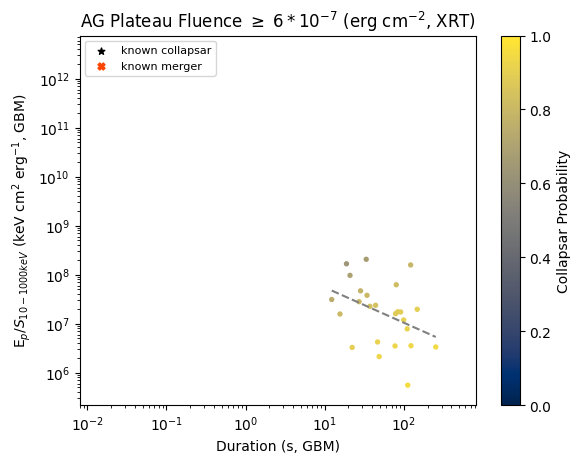

25
the line of best fit is (-0.7201468154159569 +/- 0.3585985994929235)x + (8.460551671055118+/- 0.6310633016444541)


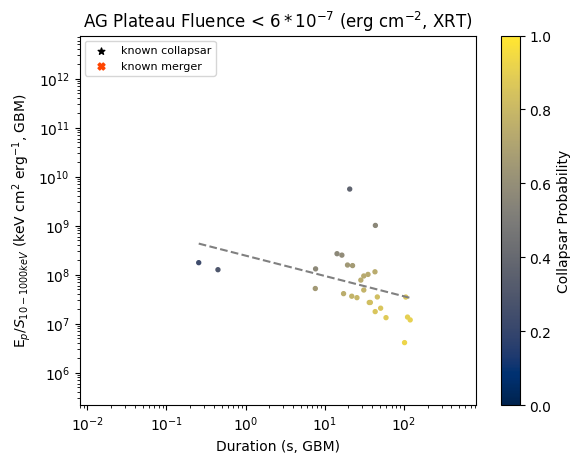

28
the line of best fit is (-0.4147809523420414 +/- 0.18780376830120538)x + (8.389601717017644+/- 0.2814589965692043)


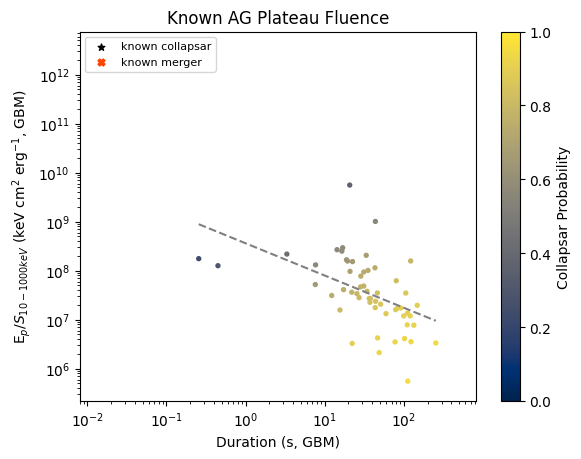

56
the line of best fit is (-0.6578967849099978 +/- 0.1548698620631607)x + (8.559716985387475+/- 0.2505926274844549)


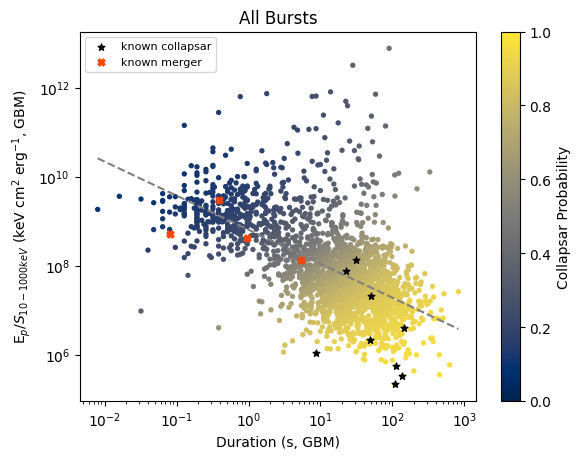

2310
the line of best fit is (-0.7639183523239481 +/- 0.02100142380510735)x + (8.810143374482342+/- 0.028857465862347605)


In [12]:
Full_Data=pd.read_csv("Goldstein_Full_DataSet_W_Name.csv")
AG_Data_0=pd.read_csv('Goldstein_AG_Full_DataSet_W_Name.csv')
nan_mask=np.where(np.isnan(AG_Data_0.iloc[:,1]))[0]
new_AGS=np.isin(AG_Data_0.index, nan_mask)
AG_Data=AG_Data_0.iloc[~new_AGS]
print(10**np.median(AG_Data['AG_fluence']))
xx1_temp=10**(Goldstein_data['Peak_E_over_Flu'].values)
xx2_temp=10**(Goldstein_data['t90'].values)
####
high_flux_mask=np.where(AG_Data['AG_fluence']>=-6.2)[0]
high_flux_bursts=AG_Data.iloc[high_flux_mask, :]
xx7=high_flux_bursts['Peak_E_over_Flu'].values
xx8=high_flux_bursts['t90'].values
Xtest_4=np.vstack((xx7,xx8)).T
p_5=model.predict_proba(Xtest_4)
e0, V0 = np.polyfit(xx8, xx7, 1, cov=True)
line_x=np.logspace(min(xx8), max(xx8), num=50, endpoint=True)
line_y=10**(e0[0]*(np.log10(line_x))+e0[1])
xx7=10**(high_flux_bursts['Peak_E_over_Flu'].values)
xx8=10**(high_flux_bursts['t90'].values)
dfc=high_flux_bursts[high_flux_bursts['Classification.']=='collapsar']
dfm=high_flux_bursts[high_flux_bursts['Classification.']=='merger']
plt.figure()
pp=plt.scatter(xx8,xx7,c=p_5[:,1],s=8,cmap='cividis', vmin=0, vmax=1)
# plt.errorbar(y=collapsar_EP_hypo_Data['Peak E. over Flue.'], x=collapsar_EP_hypo_Data['t90'], yerr=collapsar_EP_hypo_Data['E_P_Over_S_Err'], xerr=collapsar_EP_hypo_Data['t90_err'], \
#              ls='none', color='blue', marker="*", label="Known Collapsar")
plt.scatter(10**dfc['t90'], 10**dfc['Peak_E_over_Flu'],c='black',label='known collapsar',s=25, marker="*")
plt.scatter(10**dfm['t90'], 10**dfm['Peak_E_over_Flu'],c='orangered',label='known merger',s=25, marker="X")
plt.plot(line_x, line_y, linestyle="dashed", color='grey')
plt.legend(loc="upper left", prop={'size': 8})
plt.xlabel('Duration (s, GBM)')
plt.ylabel('E$_p$/$S_{10 - 1000 keV}$ (keV cm$^{2}$ erg$^{-1}$, GBM)')
plt.colorbar(pp,label='Collapsar Probability')
plt.ylim(ymin=sorted(xx1_temp)[0]-1, ymax=sorted(xx1_temp)[-1]+1)
plt.xlim(xmin=float(sorted(xx2_temp)[0]), xmax=float(sorted(xx2_temp)[-1]+1))
# plt.ylim(ymin=10**5, ymax=10**13)
# plt.xlim(xmin=10**(-3), xmax=10**3)
plt.xscale('log')
plt.yscale('log')
plt.title("AG Plateau Fluence $\geq$ $6*10^{-7}$ (erg cm$^{-2}$, XRT)")
plt.show()
print(len(high_flux_bursts))
print("the line of best fit is ({} +/- {})x + ({}+/- {})".format(e0[0], np.sqrt(V0[0][0]), e0[1], np.sqrt(V0[1][1])))
##
low_flux_mask=np.where(AG_Data['AG_fluence']<-6.2)[0]
low_flux_bursts=AG_Data.iloc[low_flux_mask, :]
xx7=low_flux_bursts['Peak_E_over_Flu'].values
xx8=low_flux_bursts['t90'].values
Xtest_4=np.vstack((xx7,xx8)).T
p_5=model.predict_proba(Xtest_4)
e1, V1 = np.polyfit(xx8, xx7, 1, cov=True)
line_x=np.logspace(min(xx8), max(xx8), num=50, endpoint=True)
line_y=10**(e1[0]*(np.log10(line_x))+e1[1])
xx7=10**(low_flux_bursts['Peak_E_over_Flu'].values)
xx8=10**(low_flux_bursts['t90'].values)
dfc=low_flux_bursts[low_flux_bursts['Classification.']=='collapsar']
dfm=low_flux_bursts[low_flux_bursts['Classification.']=='merger']
plt.figure()
pp=plt.scatter(xx8,xx7,c=p_5[:,1],s=8,cmap='cividis', vmin=0, vmax=1)
# plt.errorbar(y=collapsar_EP_hypo_Data['Peak E. over Flue.'], x=collapsar_EP_hypo_Data['t90'], yerr=collapsar_EP_hypo_Data['E_P_Over_S_Err'], xerr=collapsar_EP_hypo_Data['t90_err'], \
#              ls='none', color='blue', marker="*", label="Known Collapsar")
plt.scatter(10**dfc['t90'], 10**dfc['Peak_E_over_Flu'],c='black',label='known collapsar',s=25, marker="*")
plt.scatter(10**dfm['t90'], 10**dfm['Peak_E_over_Flu'],c='orangered',label='known merger',s=25, marker="X")
plt.plot(line_x, line_y, linestyle="dashed", color='grey')
plt.legend(loc="upper left", prop={'size': 8})
plt.xlabel('Duration (s, GBM)')
plt.ylabel('E$_p$/$S_{10 - 1000 keV}$ (keV cm$^{2}$ erg$^{-1}$, GBM)')
plt.colorbar(pp,label='Collapsar Probability')
plt.ylim(ymin=sorted(xx1_temp)[0]-1, ymax=sorted(xx1_temp)[-1]+1)
plt.xlim(xmin=float(sorted(xx2_temp)[0]), xmax=float(sorted(xx2_temp)[-1]+1))
plt.xscale('log')
plt.yscale('log')
plt.title("AG Plateau Fluence < $6*10^{-7}$ (erg cm$^{-2}$, XRT)")
plt.show()
print(len(low_flux_bursts))
print("the line of best fit is ({} +/- {})x + ({}+/- {})".format(e1[0], np.sqrt(V1[0][0]), e1[1], np.sqrt(V1[1][1])))
##
xx7=AG_Data['Peak_E_over_Flu'].values
xx8=AG_Data['t90'].values
Xtest_4=np.vstack((xx7,xx8)).T
p_5=model.predict_proba(Xtest_4)
e2, V2 = np.polyfit(xx8, xx7, 1, cov=True)
line_x=np.logspace(min(xx8), max(xx8), num=50, endpoint=True)
line_y=10**(e2[0]*(np.log10(line_x))+e2[1])
xx7=10**(AG_Data['Peak_E_over_Flu'].values)
xx8=10**(AG_Data['t90'].values)
dfc=AG_Data[AG_Data['Classification.']=='collapsar']
dfm=AG_Data[AG_Data['Classification.']=='merger']
plt.figure()
pp=plt.scatter(xx8,xx7,c=p_5[:,1],s=8,cmap='cividis', vmin=0, vmax=1)
# plt.errorbar(y=collapsar_EP_hypo_Data['Peak E. over Flue.'], x=collapsar_EP_hypo_Data['t90'], yerr=collapsar_EP_hypo_Data['E_P_Over_S_Err'], xerr=collapsar_EP_hypo_Data['t90_err'], \
#              ls='none', color='blue', marker="*", label="Known Collapsar")
plt.scatter(10**dfc['t90'], 10**dfc['Peak_E_over_Flu'],c='black',label='known collapsar',s=25, marker="*")
plt.scatter(10**dfm['t90'], 10**dfm['Peak_E_over_Flu'],c='orangered',label='known merger',s=25, marker="X")
plt.plot(line_x,line_y, linestyle="dashed", color='grey')
plt.legend(loc="upper left", prop={'size': 8})
plt.xlabel('Duration (s, GBM)')
plt.ylabel('E$_p$/$S_{10 - 1000 keV}$ (keV cm$^{2}$ erg$^{-1}$, GBM)')
plt.colorbar(pp,label='Collapsar Probability')
plt.ylim(ymin=sorted(xx1_temp)[0]-1, ymax=sorted(xx1_temp)[-1]+1)
plt.xlim(xmin=float(sorted(xx2_temp)[0]), xmax=float(sorted(xx2_temp)[-1]+1))
plt.xscale('log')
plt.yscale('log')
plt.title("Known AG Plateau Fluence")
plt.show()
print(len(AG_Data))
print("the line of best fit is ({} +/- {})x + ({}+/- {})".format(e2[0], np.sqrt(V2[0][0]), e2[1], np.sqrt(V2[1][1])))
##
xx1=Goldstein_data['Peak_E_over_Flu'].values
xx2=Goldstein_data['t90'].values
Xtest_3=np.vstack((xx1,xx2)).T
p_4=model.predict_proba(Xtest_3)
e3, V3 = np.polyfit(xx2, xx1, 1, cov=True)
line_x=np.logspace(min(xx2), max(xx2), num=50, endpoint=True)
line_y=10**(e3[0]*(np.log10(line_x))+e3[1])
xx1_temp=10**(Goldstein_data['Peak_E_over_Flu'].values)
xx2_temp=10**(Goldstein_data['t90'].values)
dfc=Goldstein_data[Goldstein_data['Classification.']=='collapsar']
dfm=Goldstein_data[Goldstein_data['Classification.']=='merger']
plt.figure()
pp=plt.scatter(xx2_temp,xx1_temp,c=p[:,1],s=8,cmap='cividis', vmin=0, vmax=1)
plt.colorbar(pp,label='Collapsar Probability')
plt.scatter(10**dfc['t90'], 10**dfc['Peak_E_over_Flu'],c='black',label='known collapsar',s=25, marker="*")
plt.scatter(10**dfm['t90'], 10**dfm['Peak_E_over_Flu'],c='orangered',label='known merger',s=25, marker="X")
plt.plot(line_x, line_y, linestyle="dashed", color='grey')
plt.legend(loc="upper left", prop={'size': 8})
plt.xlabel('Duration (s, GBM)')
plt.ylabel('E$_p$/$S_{10 - 1000 keV}$ (keV cm$^{2}$ erg$^{-1}$, GBM)')
#plt.colorbar(pp,label='Collapsar Probability')
plt.xscale('log')
plt.yscale('log')
plt.title("All Bursts")
plt.show()
print(len(Goldstein_data))
print("the line of best fit is ({} +/- {})x + ({}+/- {})".format(e3[0], np.sqrt(V3[0][0]), e3[1], np.sqrt(V3[1][1])))

In [13]:
from scipy import stats
#test that low and high are from same pop
print(stats.ttest_ind(low_flux_bursts['Peak_E_over_Flu'].values, high_flux_bursts['Peak_E_over_Flu'].values))
print(stats.ttest_ind(low_flux_bursts['t90'].values, high_flux_bursts['t90'].values))
#test that low and all redshift are from same pop
print(stats.ttest_ind(low_flux_bursts['Peak_E_over_Flu'].values, AG_Data['Peak_E_over_Flu'].values))
print(stats.ttest_ind(low_flux_bursts['t90'].values, AG_Data['t90'].values))
#test that high and all redshift are from same pop
print(stats.ttest_ind(high_flux_bursts['Peak_E_over_Flu'].values, AG_Data['Peak_E_over_Flu'].values))
print(stats.ttest_ind(high_flux_bursts['t90'].values, AG_Data['t90'].values))
#test that all redshift and all grbs are from same pop
print(stats.ttest_ind(AG_Data['Peak_E_over_Flu'].values, Goldstein_data['Peak_E_over_Flu'].values))
print(stats.ttest_ind(AG_Data['t90'].values, Goldstein_data['t90'].values))
###
from statsmodels.stats.power import TTestIndPower
effect = 0.5
alpha = 0.01
power = 0.99
analysis = TTestIndPower()
#test that low and high are from same pop
effect_size=np.mean(low_flux_bursts['Peak_E_over_Flu'].values)-np.mean(high_flux_bursts['Peak_E_over_Flu'].values)/np.std(low_flux_bursts['Peak_E_over_Flu'].values)
ratio=len(high_flux_bursts['Peak_E_over_Flu'].values)/len(low_flux_bursts['Peak_E_over_Flu'].values)
result = analysis.power(effect_size, nobs1=len(low_flux_bursts['Peak_E_over_Flu'].values), alpha=alpha, ratio=ratio)
print(1-result)
effect_size=np.mean(low_flux_bursts['t90'].values)-np.mean(high_flux_bursts['t90'].values)/np.std(low_flux_bursts['t90'].values)
ratio=len(high_flux_bursts['t90'].values)/len(low_flux_bursts['t90'].values)
result = analysis.power(effect_size, nobs1=len(low_flux_bursts['t90'].values), alpha=alpha, ratio=ratio)
print(1-result)
#test that low and all redshift are from same pop
effect_size=np.mean(AG_Data['Peak_E_over_Flu'].values)-np.mean(low_flux_bursts['Peak_E_over_Flu'].values)/np.std(AG_Data['Peak_E_over_Flu'].values)
ratio=len(low_flux_bursts['Peak_E_over_Flu'].values)/len(AG_Data['Peak_E_over_Flu'].values)
result = analysis.power(effect_size, nobs1=len(AG_Data['Peak_E_over_Flu'].values), alpha=alpha, ratio=ratio)
print(1-result)
effect_size=np.mean(AG_Data['t90'].values)-np.mean(low_flux_bursts['t90'].values)/np.std(AG_Data['t90'].values)
ratio=len(low_flux_bursts['t90'].values)/len(AG_Data['t90'].values)
result = analysis.power(effect_size, nobs1=len(AG_Data['t90'].values), alpha=alpha, ratio=ratio)
print(1-result)
#test that high and all redshift are from same pop
effect_size=np.mean(AG_Data['Peak_E_over_Flu'].values)-np.mean(high_flux_bursts['Peak_E_over_Flu'].values)/np.std(AG_Data['Peak_E_over_Flu'].values)
ratio=len(high_flux_bursts['Peak_E_over_Flu'].values)/len(AG_Data['Peak_E_over_Flu'].values)
result = analysis.power(effect_size, nobs1=len(AG_Data['Peak_E_over_Flu'].values), alpha=alpha, ratio=ratio)
print(1-result)
effect_size=np.mean(AG_Data['t90'].values)-np.mean(high_flux_bursts['t90'].values)/np.std(AG_Data['t90'].values)
ratio=len(high_flux_bursts['t90'].values)/len(AG_Data['t90'].values)
result = analysis.power(effect_size, nobs1=len(AG_Data['t90'].values), alpha=alpha, ratio=ratio)
print(1-result)
#test that all redshift and all grbs are from same pop
effect_size=np.mean(Goldstein_data['Peak_E_over_Flu'].values)-np.mean(AG_Data['Peak_E_over_Flu'].values)/np.std(Goldstein_data['Peak_E_over_Flu'].values)
ratio=len(AG_Data['Peak_E_over_Flu'].values)/len(Goldstein_data['Peak_E_over_Flu'].values)
result = analysis.power(effect_size, nobs1=len(Goldstein_data['Peak_E_over_Flu'].values), alpha=alpha, ratio=ratio)
print(1-result)
effect_size=np.mean(Goldstein_data['t90'].values)-np.mean(AG_Data['t90'].values)/np.std(Goldstein_data['t90'].values)
ratio=len(AG_Data['t90'].values)/len(Goldstein_data['t90'].values)
result = analysis.power(effect_size, nobs1=len(Goldstein_data['t90'].values), alpha=alpha, ratio=ratio)
print(1-result)

Ttest_indResult(statistic=3.434340877366175, pvalue=0.0011882092912138945)
Ttest_indResult(statistic=-2.553629981513469, pvalue=0.01369291849600584)
Ttest_indResult(statistic=1.6747980967024894, pvalue=0.09778379519756358)
Ttest_indResult(statistic=-1.1750142696283463, pvalue=0.24338974580796094)
Ttest_indResult(statistic=-2.041702582553376, pvalue=0.044518875659943634)
Ttest_indResult(statistic=1.6998951596915237, pvalue=0.09308490873305726)
Ttest_indResult(statistic=-2.950673502403687, pvalue=0.0032019887348330588)
Ttest_indResult(statistic=3.7947654795514287, pvalue=0.00015149552214550958)
0.0
0.0026315520685684657
0.0
0.029114049054829727
0.0
0.0
0.48288582974035854
0.0002691617191572515


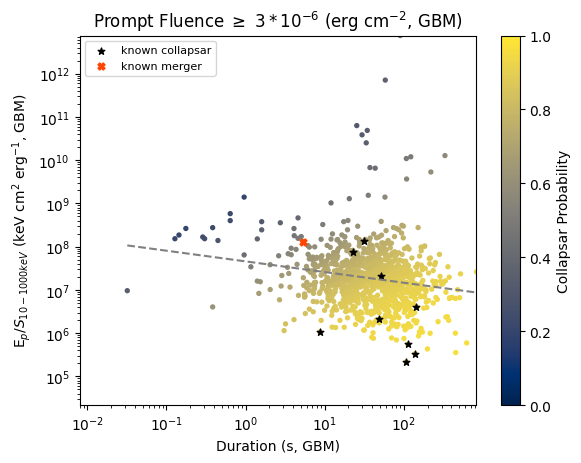

1116
the line of best fit is (-0.24682060145294835 +/- 0.039155369917626824)x + (7.660765161309495+/- 0.0642446680006917)


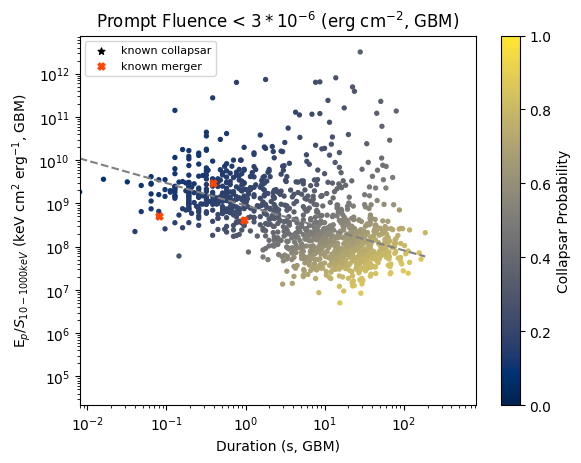

1194
the line of best fit is (-0.5190680881085595 +/- 0.026561062545875643)x + (8.95226845754483+/- 0.02831675238512715)


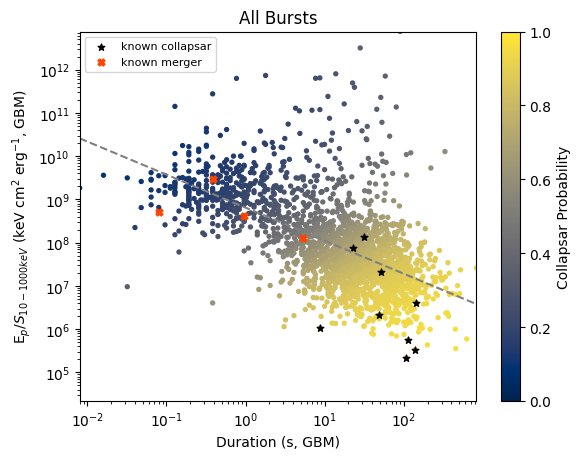

2310
the line of best fit is (-0.7639183523239481 +/- 0.02100142380510735)x + (8.810143374482342+/- 0.028857465862347605)


In [14]:
Full_Data=pd.read_csv("Goldstein_Full_DataSet_W_Name.csv")
xx1_temp=10**(Full_Data['Peak_E_over_Flu'].values)
xx2_temp=10**(Full_Data['t90'].values)
####
high_flux_mask=np.where(Full_Data['Fluence']>=-5.5)[0]
high_flux_bursts=Full_Data.iloc[high_flux_mask, :]
xx7=high_flux_bursts['Peak_E_over_Flu'].values
xx8=high_flux_bursts['t90'].values
Xtest_4=np.vstack((xx7,xx8)).T
p_5=model.predict_proba(Xtest_4)
e0, V0 = np.polyfit(xx8, xx7, 1, cov=True)
line_x=np.logspace(min(xx8), max(xx8), num=50, endpoint=True)
line_y=10**(e0[0]*(np.log10(line_x))+e0[1])
xx7=10**(high_flux_bursts['Peak_E_over_Flu'].values)
xx8=10**(high_flux_bursts['t90'].values)
dfc=high_flux_bursts[high_flux_bursts['Classification.']=='collapsar']
dfm=high_flux_bursts[high_flux_bursts['Classification.']=='merger']
plt.figure()
pp=plt.scatter(xx8,xx7,c=p_5[:,1],s=8,cmap='cividis', vmin=0, vmax=1)
# plt.errorbar(y=collapsar_EP_hypo_Data['Peak E. over Flue.'], x=collapsar_EP_hypo_Data['t90'], yerr=collapsar_EP_hypo_Data['E_P_Over_S_Err'], xerr=collapsar_EP_hypo_Data['t90_err'], \
#              ls='none', color='blue', marker="*", label="Known Collapsar")
plt.scatter(10**dfc['t90'], 10**dfc['Peak_E_over_Flu'],c='black',label='known collapsar',s=25, marker="*")
plt.scatter(10**dfm['t90'], 10**dfm['Peak_E_over_Flu'],c='orangered',label='known merger',s=25, marker="X")
plt.plot(line_x, line_y, linestyle="dashed", color='grey')
plt.legend(loc="upper left", prop={'size': 8})
plt.xlabel('Duration (s, GBM)')
plt.ylabel('E$_p$/$S_{10 - 1000 keV}$ (keV cm$^{2}$ erg$^{-1}$, GBM)')
plt.colorbar(pp,label='Collapsar Probability')
plt.ylim(ymin=sorted(xx1_temp)[0]/10, ymax=sorted(xx1_temp)[-1]+1)
plt.xlim(xmin=float(sorted(xx2_temp)[0]), xmax=float(sorted(xx2_temp)[-1]+1))
# plt.ylim(ymin=10**5, ymax=10**13)
# plt.xlim(xmin=10**(-3), xmax=10**3)
plt.xscale('log')
plt.yscale('log')
plt.title("Prompt Fluence $\geq$ $3*10^{-6}$ (erg cm$^{-2}$, GBM)")
plt.show()
print(len(high_flux_bursts))
print("the line of best fit is ({} +/- {})x + ({}+/- {})".format(e0[0], np.sqrt(V0[0][0]), e0[1], np.sqrt(V0[1][1])))
##
low_flux_mask=np.where(Full_Data['Fluence']<-5.5)[0]
low_flux_bursts=Full_Data.iloc[low_flux_mask, :]
xx7=low_flux_bursts['Peak_E_over_Flu'].values
xx8=low_flux_bursts['t90'].values
Xtest_4=np.vstack((xx7,xx8)).T
p_5=model.predict_proba(Xtest_4)
e1, V1 = np.polyfit(xx8, xx7, 1, cov=True)
line_x=np.logspace(min(xx8), max(xx8), num=50, endpoint=True)
line_y=10**(e1[0]*(np.log10(line_x))+e1[1])
xx7=10**(low_flux_bursts['Peak_E_over_Flu'].values)
xx8=10**(low_flux_bursts['t90'].values)
dfc=low_flux_bursts[low_flux_bursts['Classification.']=='collapsar']
dfm=low_flux_bursts[low_flux_bursts['Classification.']=='merger']
plt.figure()
pp=plt.scatter(xx8,xx7,c=p_5[:,1],s=8,cmap='cividis', vmin=0, vmax=1)
# plt.errorbar(y=collapsar_EP_hypo_Data['Peak E. over Flue.'], x=collapsar_EP_hypo_Data['t90'], yerr=collapsar_EP_hypo_Data['E_P_Over_S_Err'], xerr=collapsar_EP_hypo_Data['t90_err'], \
#              ls='none', color='blue', marker="*", label="Known Collapsar")
plt.scatter(10**dfc['t90'], 10**dfc['Peak_E_over_Flu'],c='black',label='known collapsar',s=25, marker="*")
plt.scatter(10**dfm['t90'], 10**dfm['Peak_E_over_Flu'],c='orangered',label='known merger',s=25, marker="X")
plt.plot(line_x, line_y, linestyle="dashed", color='grey')
plt.legend(loc="upper left", prop={'size': 8})
plt.xlabel('Duration (s, GBM)')
plt.ylabel('E$_p$/$S_{10 - 1000 keV}$ (keV cm$^{2}$ erg$^{-1}$, GBM)')
plt.colorbar(pp,label='Collapsar Probability')
plt.ylim(ymin=sorted(xx1_temp)[0]/10, ymax=sorted(xx1_temp)[-1]+1)
plt.xlim(xmin=float(sorted(xx2_temp)[0]), xmax=float(sorted(xx2_temp)[-1]+1))
plt.xscale('log')
plt.yscale('log')
plt.title("Prompt Fluence < $3*10^{-6}$ (erg cm$^{-2}$, GBM)")
plt.show()
print(len(low_flux_bursts))
print("the line of best fit is ({} +/- {})x + ({}+/- {})".format(e1[0], np.sqrt(V1[0][0]), e1[1], np.sqrt(V1[1][1])))
##
xx1=Full_Data['Peak_E_over_Flu'].values
xx2=Full_Data['t90'].values
Xtest_3=np.vstack((xx1,xx2)).T
p_4=model.predict_proba(Xtest_3)
e3, V3 = np.polyfit(xx2, xx1, 1, cov=True)
line_x=np.logspace(min(xx2), max(xx2), num=50, endpoint=True)
line_y=10**(e3[0]*(np.log10(line_x))+e3[1])
xx1_temp=10**(Full_Data['Peak_E_over_Flu'].values)
xx2_temp=10**(Full_Data['t90'].values)
dfc=Full_Data[Full_Data['Classification.']=='collapsar']
dfm=Full_Data[Full_Data['Classification.']=='merger']
plt.figure()
pp=plt.scatter(xx2_temp,xx1_temp,c=p[:,1],s=8,cmap='cividis', vmin=0, vmax=1)
plt.colorbar(pp,label='Collapsar Probability')
plt.scatter(10**dfc['t90'], 10**dfc['Peak_E_over_Flu'],c='black',label='known collapsar',s=25, marker="*")
plt.scatter(10**dfm['t90'], 10**dfm['Peak_E_over_Flu'],c='orangered',label='known merger',s=25, marker="X")
plt.plot(line_x, line_y, linestyle="dashed", color='grey')
plt.legend(loc="upper left", prop={'size': 8})
plt.xlabel('Duration (s, GBM)')
plt.ylabel('E$_p$/$S_{10 - 1000 keV}$ (keV cm$^{2}$ erg$^{-1}$, GBM)')
#plt.colorbar(pp,label='Collapsar Probability')
plt.ylim(ymin=sorted(xx1_temp)[0]/10, ymax=sorted(xx1_temp)[-1]+1)
plt.xlim(xmin=float(sorted(xx2_temp)[0]), xmax=float(sorted(xx2_temp)[-1]+1))
plt.xscale('log')
plt.yscale('log')
plt.title("All Bursts")
plt.show()
print(len(Full_Data))
print("the line of best fit is ({} +/- {})x + ({}+/- {})".format(e3[0], np.sqrt(V3[0][0]), e3[1], np.sqrt(V3[1][1])))

In [15]:
from scipy import stats
#test that low and high are from same pop
print(stats.ttest_ind(low_flux_bursts['Peak_E_over_Flu'].values, high_flux_bursts['Peak_E_over_Flu'].values))
print(stats.ttest_ind(low_flux_bursts['t90'].values, high_flux_bursts['t90'].values))
#test that low and all pop are from same pop
print(stats.ttest_ind(low_flux_bursts['Peak_E_over_Flu'].values, Full_Data['Peak_E_over_Flu'].values))
print(stats.ttest_ind(low_flux_bursts['t90'].values, Full_Data['t90'].values))
#test that high and all pop are from same pop
print(stats.ttest_ind(high_flux_bursts['Peak_E_over_Flu'].values, Full_Data['Peak_E_over_Flu'].values))
print(stats.ttest_ind(high_flux_bursts['t90'].values, Full_Data['t90'].values))
###
from statsmodels.stats.power import TTestIndPower
effect = 0.5
alpha = 0.01
power = 0.99
analysis = TTestIndPower()
#test that low and high are from same pop
effect_size=np.mean(low_flux_bursts['Peak_E_over_Flu'].values)-np.mean(high_flux_bursts['Peak_E_over_Flu'].values)/np.std(low_flux_bursts['Peak_E_over_Flu'].values)
ratio=len(high_flux_bursts['Peak_E_over_Flu'].values)/len(low_flux_bursts['Peak_E_over_Flu'].values)
result = analysis.power(effect_size, nobs1=len(low_flux_bursts['Peak_E_over_Flu'].values), alpha=alpha, ratio=ratio)
print(1-result)
effect_size=np.mean(low_flux_bursts['t90'].values)-np.mean(high_flux_bursts['t90'].values)/np.std(low_flux_bursts['t90'].values)
ratio=len(high_flux_bursts['t90'].values)/len(low_flux_bursts['t90'].values)
result = analysis.power(effect_size, nobs1=len(low_flux_bursts['t90'].values), alpha=alpha, ratio=ratio)
print(1-result)
#test that low and all pop are from same pop
effect_size=np.mean(Full_Data['Peak_E_over_Flu'].values)-np.mean(low_flux_bursts['Peak_E_over_Flu'].values)/np.std(Full_Data['Peak_E_over_Flu'].values)
ratio=len(low_flux_bursts['Peak_E_over_Flu'].values)/len(Full_Data['Peak_E_over_Flu'].values)
result = analysis.power(effect_size, nobs1=len(Full_Data['Peak_E_over_Flu'].values), alpha=alpha, ratio=ratio)
print(1-result)
effect_size=np.mean(Full_Data['t90'].values)-np.mean(low_flux_bursts['t90'].values)/np.std(Full_Data['t90'].values)
ratio=len(low_flux_bursts['t90'].values)/len(Full_Data['t90'].values)
result = analysis.power(effect_size, nobs1=len(Full_Data['t90'].values), alpha=alpha, ratio=ratio)
print(1-result)
#test that high and all pop are from same pop
effect_size=np.mean(Full_Data['Peak_E_over_Flu'].values)-np.mean(high_flux_bursts['Peak_E_over_Flu'].values)/np.std(Full_Data['Peak_E_over_Flu'].values)
ratio=len(high_flux_bursts['Peak_E_over_Flu'].values)/len(Full_Data['Peak_E_over_Flu'].values)
result = analysis.power(effect_size, nobs1=len(Full_Data['Peak_E_over_Flu'].values), alpha=alpha, ratio=ratio)
print(1-result)
effect_size=np.mean(Full_Data['t90'].values)-np.mean(high_flux_bursts['t90'].values)/np.std(Full_Data['t90'].values)
ratio=len(high_flux_bursts['t90'].values)/len(Full_Data['t90'].values)
result = analysis.power(effect_size, nobs1=len(Full_Data['t90'].values), alpha=alpha, ratio=ratio)
print(1-result)

Ttest_indResult(statistic=41.72960156123483, pvalue=4.5034462330344224e-284)
Ttest_indResult(statistic=-30.729036453939496, pvalue=3.968113170306738e-174)
Ttest_indResult(statistic=18.775780305311837, pvalue=5.122956313289735e-75)
Ttest_indResult(statistic=-14.595925901231944, pvalue=6.914447013619438e-47)
Ttest_indResult(statistic=-20.598845329576413, pvalue=5.6417441494381904e-89)
Ttest_indResult(statistic=17.066037135260466, pvalue=9.735569120617027e-63)
0.04888285302227713
0.0
0.0
0.00030490288642237573
0.0
0.0
